In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:97% !important; }</style>"))
import pickle
from IPython.display import display, Math, Markdown
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import autograd.numpy as anp
from autograd import jacobian
import time
from tqdm import tqdm
from copy import deepcopy

import os
import sys
sys.path.insert(0, os.getcwd()+'/expansion_suite')

sns.set(font_scale=1.5)
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
np.random.seed(256)
# from expansion import *
# from lin_quad import *
# from lin_quad_util import *
# from elasticity import *
# from utilities import *
from BY_model_specification import *
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go

colorscale_1 = [[0, '#EF553B'], [1, '#EF553B']]
colorscale_2 = [[0, '#00CC96'], [1, '#00CC96']]
colorscale_3 = [[0, '#636EFA'], [1, '#636EFA']]

ModuleNotFoundError: No module named 'expansion'

In [ ]:
with open('data/args.pkl', 'rb') as f:
    args = pickle.load(f)
with open('data/var_shape.pkl', 'rb') as f:
    var_shape = pickle.load(f)
with open('data/exogenous.pkl', 'rb') as f:
    exogenous = pickle.load(f)
with open('data/solution.pkl', 'rb') as f:
    solution = pickle.load(f)
with open('data/stata_varibles.pkl', 'rb') as f:
    stata_varibles = pickle.load(f)

with open('data/time_series_exp_first.pkl', 'rb') as f:
    time_series_exp_first = pickle.load(f)
with open('data/time_series_exp_second.pkl', 'rb') as f:
    time_series_exp_second = pickle.load(f)

with open('data/time_series_approx_first.pkl', 'rb') as f:
    time_series_approx_first = pickle.load(f)
with open('data/time_series_approx_second.pkl', 'rb') as f:
    time_series_approx_second = pickle.load(f)
    
with open('data/time_series_hybrid_first.pkl', 'rb') as f:
    time_series_hybrid_first = pickle.load(f)
with open('data/time_series_hybrid_second.pkl', 'rb') as f:
    time_series_hybrid_second = pickle.load(f)

with open('data/time_series_IT_third.pkl', 'rb') as f:
    time_series_IT_third = pickle.load(f)

with open('data/se2_exp_first.pkl', 'rb') as f:
    se2_exp_first = pickle.load(f)
with open('data/se2_exp_second.pkl', 'rb') as f:
    se2_exp_second = pickle.load(f)

with open('data/se2_approx_first.pkl', 'rb') as f:
    se2_approx_first = pickle.load(f)
with open('data/se2_approx_second.pkl', 'rb') as f:
    se2_approx_second = pickle.load(f)
    
with open('data/se2_hybrid_first.pkl', 'rb') as f:
    se2_hybrid_first = pickle.load(f)
with open('data/se2_hybrid_second.pkl', 'rb') as f:
    se2_hybrid_second = pickle.load(f)

γ, β, ρ, α, ϕ_e, σ_squared, ν_1, σ_w, μ, μ_d, ϕ, ϕ_d, ϕ_c = args
n_Y, n_Z, n_W = var_shape
modelSol_1, modelSol_2, Z_tp1, Z0_tp1, Z1_tp1, Z2_tp1, gc_tp1, gc0_tp1, gc1_tp1, gc2_tp1, gd_tp1, gd0_tp1, gd1_tp1, gd2_tp1, vmc0_t, rmc0_t = exogenous
sol_first, sol_second, sol_third = solution
T, Z1_series, Z2_series, W_t = stata_varibles

log_SDF_tp1_1_hybrid_first_series, log_SDF_tp1_2_hybrid_first_series, log_SDF_tp1_3_hybrid_first_series, log_SDF_tp1_4_hybrid_first_series,\
PD_list_hybrid_first_sim, e_d_hybrid_first_series, shock_elasticity_1_hybrid_first_series, shock_elasticity_2_hybrid_first_series, shock_elasticity_3_hybrid_first_series, shock_elasticity_4_hybrid_first_series = time_series_hybrid_first
log_SDF_tp1_1_hybrid_second_series, log_SDF_tp1_2_hybrid_second_series, log_SDF_tp1_3_hybrid_second_series, log_SDF_tp1_4_hybrid_second_series,\
PD_list_hybrid_second_sim, e_d_hybrid_second_series, shock_elasticity_1_hybrid_second_series, shock_elasticity_2_hybrid_second_series, shock_elasticity_3_hybrid_second_series, shock_elasticity_4_hybrid_second_series = time_series_hybrid_second

vmc_t_first_series, rmc_t_exp_first_series, log_N_tp1_num_first_series, log_N_tp1_exp_deno_first_series, log_N_tp1_exp_first_series,\
log_SDF_tp1_1_exp_first_series, log_SDF_tp1_2_exp_first_series, log_SDF_tp1_3_exp_first_series, log_SDF_tp1_4_exp_first_series,\
PD_list_exp_first_sim, e_d_exp_first_series, shock_elasticity_1_exp_first_series, shock_elasticity_2_exp_first_series, shock_elasticity_3_exp_first_series, shock_elasticity_4_exp_first_series = time_series_exp_first

vmc_t_second_series, rmc_t_exp_second_series, log_N_tp1_num_second_series, log_N_tp1_exp_deno_second_series, log_N_tp1_exp_second_series,\
log_SDF_tp1_1_exp_second_series, log_SDF_tp1_2_exp_second_series, log_SDF_tp1_3_exp_second_series, log_SDF_tp1_4_exp_second_series,\
PD_list_exp_second_sim, e_d_exp_second_series, shock_elasticity_1_exp_second_series, shock_elasticity_2_exp_second_series, shock_elasticity_3_exp_second_series, shock_elasticity_4_exp_second_series = time_series_exp_second

vmc_t_first_series, rmc_t_approx_first_series, log_N_tp1_num_first_series, log_N_tp1_approx_deno_first_series, log_N_tp1_approx_first_series,\
log_SDF_tp1_1_approx_first_series, log_SDF_tp1_2_approx_first_series, log_SDF_tp1_3_approx_first_series, log_SDF_tp1_4_approx_first_series,\
PD_list_approx_first_sim, e_d_approx_first_series, shock_elasticity_1_approx_first_series, shock_elasticity_2_approx_first_series, shock_elasticity_3_approx_first_series, shock_elasticity_4_approx_first_series = time_series_approx_first

vmc_t_second_series, rmc_t_approx_second_series, log_N_tp1_num_second_series, log_N_tp1_approx_deno_second_series, log_N_tp1_approx_second_series,\
log_SDF_tp1_1_approx_second_series, log_SDF_tp1_2_approx_second_series, log_SDF_tp1_3_approx_second_series, log_SDF_tp1_4_approx_second_series,\
PD_list_approx_second_sim, e_d_approx_second_series, shock_elasticity_1_approx_second_series, shock_elasticity_2_approx_second_series, shock_elasticity_3_approx_second_series, shock_elasticity_4_approx_second_series = time_series_approx_second

vmc_t_third_series, rmc_t_IT_third_series, log_N_tp1_num_third_series, log_N_tp1_IT_deno_third_series, log_N_tp1_IT_third_series,\
log_SDF_tp1_1_IT_third_series, log_SDF_tp1_2_IT_third_series, log_SDF_tp1_3_IT_third_series, log_SDF_tp1_4_IT_third_series,\
PD_list_IT_third_sim, e_d_IT_third_series, shock_elasticity_1_IT_third_series, shock_elasticity_2_IT_third_series, shock_elasticity_3_IT_third_series, shock_elasticity_4_IT_third_series = time_series_IT_third

shock_elasticity_1_exp_first_series_2, shock_elasticity_2_exp_first_series_2, shock_elasticity_3_exp_first_series_2, shock_elasticity_4_exp_first_series_2 = se2_exp_first
shock_elasticity_1_exp_second_series_2, shock_elasticity_2_exp_second_series_2, shock_elasticity_3_exp_second_series_2, shock_elasticity_4_exp_second_series_2 = se2_exp_second
shock_elasticity_1_approx_first_series_2, shock_elasticity_2_approx_first_series_2, shock_elasticity_3_approx_first_series_2, shock_elasticity_4_approx_first_series_2 = se2_approx_first
shock_elasticity_1_approx_second_series_2, shock_elasticity_2_approx_second_series_2, shock_elasticity_3_approx_second_series_2, shock_elasticity_4_approx_second_series_2 = se2_approx_second
shock_elasticity_1_hybrid_first_series_2, shock_elasticity_2_hybrid_first_series_2, shock_elasticity_3_hybrid_first_series_2, shock_elasticity_4_hybrid_first_series_2 = se2_hybrid_first
shock_elasticity_1_hybrid_second_series_2, shock_elasticity_2_hybrid_second_series_2, shock_elasticity_3_hybrid_second_series_2, shock_elasticity_4_hybrid_second_series_2 = se2_hybrid_second

# BY Model
#### BY Notation
$$
\begin{align*}
x_{t+1}&=& \alpha x_{t}+\varphi_e\sigma_{t}e_{t+1}
\\\sigma_{t+1}^{2}&=&\sigma^{2}+\nu_1\left(\sigma_{t}^{2}-\sigma^2\right)+ \sigma_ww_{t+1}\\
\log C_{t+1}-\log C_{t}&=& \mu+x_{t}+\sigma_{t}\eta_{t+1}\\
\log D_{t+1}-\log D_{t}&=& \mu_d+\phi x_{t}+\phi_d\sigma_{t}u_{t+1}
\end{align*}
$$

#### New Notation
$$
\begin{align*}
Z_{t+1} &= \alpha_z Z_t + \sqrt{Y_t} \sigma_z\cdot W_{t+1}\\
Y_{t+1} &= 1 + \alpha_y(Y_t-1)+\sigma_y\cdot W_{t+1}\\
\hat{C}_{t+1}-\hat{C}_t &= \eta_c + Z_t +\sqrt{Y_t}\sigma_c\cdot W_{t+1}\\
\hat{D}_{t+1}-\hat{D}_t &= \eta_d + ϕZ_t +\sqrt{Y_t}\sigma_d\cdot W_{t+1}\\
\end{align*}
$$

##### Recurisve Preference

\begin{align*}
V_t & = \left[(1-\beta)C_t^{1-\rho}+\beta R_t^{1-\rho}\right]^{\frac{1}{1-\rho}} \\
R_t & = \mathbb{E}\left[V_{t+1}^{1-\gamma} \mid {\mathfrak F}_t\right]^{\frac{1}{1-\gamma}} \\
\Rightarrow \frac{S_{t+1}}{S_t} &= \beta \left(\frac{V_{t+1}}{R_t}\right)^{1-\gamma} \left(\frac{V_{t+1}}{R_t}\right)^{\rho-1} \left(\frac{C_{t+1}}{C_t}\right)^{-\rho}
\end{align*}

In [ ]:
## Parameter initialization
α_z = α
σ_z = ϕ_e
α_y = ν_1
σ_y = σ_w
η_c = μ
σ_c = ϕ_c
η_d = μ_d
ϕ = ϕ
σ_d = ϕ_d

args = (γ, β, ρ, α_z, σ_z, α_y, σ_y, η_c, σ_c, η_d, σ_d, ϕ)

Parameters = pd.DataFrame(args).T
Parameters.columns = [r'$γ$', r'$β$', r'$ρ$', r'$α_z$', r'$σ_z$', r'$α_y$', r'$σ_y$', r'$η_c$', r'$σ_c$', r'$η_d$', r'$σ_d$', r'$ϕ$']
Parameters.index = ['Parameter Values']
Parameters

## Approximation for the Evolution Equations

In [ ]:
display_formula(Lq = Z_tp1.split()[0], Var = r'Z_{{t+1}}')
display_formula(Lq = Z_tp1.split()[1], Var = r'Y_{{t+1}}')
display_formula(Lq = gc_tp1, Var = r'\hat C_{{t+1}} - \hat C_{{t}}')
display_formula(Lq = gd_tp1, Var = r'\hat D_{{t+1}} - \hat D_{{t}}')

## Approximation for Continuation Values

In [ ]:
var = r'\hat V_{{t}} - \hat C_{{t}}'
display_formula(Lq = sol_first['vmc_t'], Var = var, method = 'First Protocol')
display_formula(Lq = sol_second['vmc_t'], Var = var, method = 'Second Protocol')

In [2]:
var = r'\hat V_{{t+1}} - \hat C_{{t}}'
display_formula(Lq = (sol_first['vmc_tp1'] + gc_tp1), Var = var, method = 'First Protocol')
display_formula(Lq = (sol_second['vmc_tp1'] + gc_tp1), Var = var, method = 'Second Protocol')

NameError: name 'display_formula' is not defined

In [3]:
var = r'\hat R_{{t}} - \hat C_{{t}}'
display_formula(Lq = sol_first['rmc_t_approx'], Var = var, method = 'First Protocol')
display_formula(Lq = sol_second['rmc_t_approx'], Var = var, method = 'Second Protocol')
display_formula(Lq = sol_first['rmc_t_exp'], Var = var, method = 'First Protocol, exp')
display_formula(Lq = sol_second['rmc_t_exp'], Var = var, method = 'Second Protocol, exp')

NameError: name 'display_formula' is not defined

## Approximation for Log Change of Measure

In [4]:
var = r'\text{Numerator of }\log N_{{t+1}}^*: (1-γ)*(\hat V_{{t+1}} - \hat C_{{t}})'
display_formula(Lq = (1-γ)*(sol_first['vmc_tp1'] + gc_tp1), Var = var, method = 'First Protocol')
display_formula(Lq = (1-γ)*(sol_second['vmc_tp1'] + gc_tp1), Var = var, method = 'Second Protocol')

NameError: name 'display_formula' is not defined

In [9]:
var = r'\text{Denominator of }\log N_{{t+1}}^*: (1-γ)*(\hat R_{{t}} - \hat C_{{t}})'
display_formula(Lq = (1-γ)*(sol_first['rmc_t_approx']), Var = var, method = 'First Protocol')
display_formula(Lq = (1-γ)*(sol_second['rmc_t_approx']), Var = var, method = 'Second Protocol')
display_formula(Lq = (1-γ)*(sol_first['rmc_t_exp']), Var = var, method = 'First Protocol, exp')
display_formula(Lq = (1-γ)*(sol_second['rmc_t_exp']), Var = var, method = 'Second Protocol, exp')

--------------------------------------------------------------------------------
First Protocol


<IPython.core.display.Math object>

--------------------------------------------------------------------------------
Second Protocol


<IPython.core.display.Math object>

--------------------------------------------------------------------------------
First Protocol, exp


<IPython.core.display.Math object>

--------------------------------------------------------------------------------
Second Protocol, exp


<IPython.core.display.Math object>

In [10]:
var = r'\log N_{{t+1}}^*'
display_formula(Lq = sol_first['log_N_tp1_approx'], Var = var, method = 'First Protocol')
display_formula(Lq = sol_second['log_N_tp1_approx'], Var = var, method = 'Second Protocol')
display_formula(Lq = sol_first['log_N_tp1_exp'], Var = var, method = 'First Protocol, exp')
display_formula(Lq = sol_second['log_N_tp1_exp'], Var = var, method = 'Second Protocol, exp')
# display_formula(Lq = sol_third['log_N_tp1_IT'], Var = var, method = 'Expansion Suite, exp')

--------------------------------------------------------------------------------
First Protocol


<IPython.core.display.Math object>

--------------------------------------------------------------------------------
Second Protocol


<IPython.core.display.Math object>

--------------------------------------------------------------------------------
First Protocol, exp


<IPython.core.display.Math object>

--------------------------------------------------------------------------------
Second Protocol, exp


<IPython.core.display.Math object>

## Approximation for Log Stohcastic Discount Factor

In [11]:
var = r'\log \text{SDF}_{t+1}'
display_formula(Lq = sol_first['log_SDF_tp1_approx'], Var = var, method = 'First Protocol')
display_formula(Lq = sol_second['log_SDF_tp1_approx'], Var = var, method = 'Second Protocol')
display_formula(Lq = sol_first['log_SDF_tp1_exp'], Var = var, method = 'First Protocol, exp')
display_formula(Lq = sol_second['log_SDF_tp1_exp'], Var = var, method = 'Second Protocol, exp')
display_formula(Lq = sol_first['log_SDF_tp1_hybrid'], Var = var, method = 'First Protocol, hybrid')
display_formula(Lq = sol_second['log_SDF_tp1_hybrid'], Var = var, method = 'Second Protocol, hybrid')
display_formula(Lq = sol_third['log_SDF_tp1_IT'], Var = var, method = 'Expansion Suite, hybrid')

--------------------------------------------------------------------------------
First Protocol


<IPython.core.display.Math object>

--------------------------------------------------------------------------------
Second Protocol


<IPython.core.display.Math object>

--------------------------------------------------------------------------------
First Protocol, exp


<IPython.core.display.Math object>

--------------------------------------------------------------------------------
Second Protocol, exp


<IPython.core.display.Math object>

--------------------------------------------------------------------------------
First Protocol, hybrid


<IPython.core.display.Math object>

--------------------------------------------------------------------------------
Second Protocol, hybrid


<IPython.core.display.Math object>

--------------------------------------------------------------------------------
Expansion Suite, hybrid


<IPython.core.display.Math object>

## Eigenvalues and Eigenfunctions

In [12]:
var = r'\log e_D'
display_formula(Lq = sol_first['e_d_approx'], Var = var, method = 'First Protocol')
display_formula(Lq = sol_second['e_d_approx'], Var = var, method = 'Second Protocol')
display_formula(Lq = sol_first['e_d_exp'], Var = var, method = 'First Protocol, exp')
display_formula(Lq = sol_second['e_d_exp'], Var = var, method = 'Second Protocol, exp')
display_formula(Lq = sol_first['e_d_hybrid'], Var = var, method = 'First Protocol, hybrid')
display_formula(Lq = sol_second['e_d_hybrid'], Var = var, method = 'Second Protocol, hybrid')
display_formula(Lq = sol_third['e_d_IT'], Var = var, method = 'Expansion Suite, hybrid')

--------------------------------------------------------------------------------
First Protocol


<IPython.core.display.Math object>

--------------------------------------------------------------------------------
Second Protocol


<IPython.core.display.Math object>

--------------------------------------------------------------------------------
First Protocol, exp


<IPython.core.display.Math object>

--------------------------------------------------------------------------------
Second Protocol, exp


<IPython.core.display.Math object>

--------------------------------------------------------------------------------
First Protocol, hybrid


<IPython.core.display.Math object>

--------------------------------------------------------------------------------
Second Protocol, hybrid


<IPython.core.display.Math object>

--------------------------------------------------------------------------------
Expansion Suite, hybrid


<IPython.core.display.Math object>

In [13]:
eigenvalues = pd.DataFrame([sol_first['η_D_approx'],sol_second['η_D_approx'],sol_first['η_D_exp'],sol_second['η_D_exp'],sol_first['η_D_hybrid'],sol_second['η_D_hybrid'],sol_third['η_D_IT']])
eigenvalues.index = ['First Protocol', \
                     'Second Protocol', \
                     'First Protocol, exp', \
                     'Second Protocol, exp',\
                      'First Protocol, hybrid', \
                     'Second Protocol, hybrid',\
                     'Expansion Suite, hybrid']
eigenvalues.columns = ['eigenvalues']
eigenvalues

eigenvalues
First Protocol               -0.0043
Second Protocol              -0.0042
First Protocol, exp          -0.0047
Second Protocol, exp         -0.0049
First Protocol, hybrid       -0.0047
Second Protocol, hybrid      -0.0049
Expansion Suite, hybrid      -0.0049

## Simulated Time Series for Each Approximated Variables

In [14]:
def plot_time_series_2(series, title, label = ['First Protocol exp', 'Second Protocol exp']):
    data = pd.DataFrame(series).T
    data.columns = ['1','2']
    time = data.index.tolist()

    fig, ax = plt.subplots(1,1, figsize = (14,10))
    sns.lineplot(data = data, x = time, y = '1', ax = ax, label = label[0])
    sns.lineplot(data = data, x = time, y = '2', ax = ax, label = label[1])
    ax.set_xlabel('time')
    ax.set_ylabel(title)
    ax.set_title(title)
    plt.legend()
    plt.show()
    
def plot_time_series(series, title, label = ['First Protocol exp', 'Second Protocol exp', 'Expansion Suite exp']):
    data = pd.DataFrame(series).T
    data.columns = ['1','2','3']
    time = data.index.tolist()

    fig, ax = plt.subplots(1,1, figsize = (14,10))
    sns.lineplot(data = data, x = time, y = '1', ax = ax, label = label[0])
    sns.lineplot(data = data, x = time, y = '2', ax = ax, label = label[1])
    sns.lineplot(data = data, x = time, y = '3', ax = ax, label = label[2])
    ax.set_xlabel('time')
    ax.set_ylabel(title)
    ax.set_title(title +', 2 Methods for a Single Time Series with the Same Shocks')
    plt.legend()
    plt.show()

In [15]:
# Z_series = Z0_tp1.coeffs['c'] + Z1_series + 2 * Z2_series
# plot_time_series_2([Z_series[0,:], Z_series[1,:]], title = r'$x_t,\ \sigma_t^2$', label = [r'$x_t$',r'$\sigma_t^2$'])

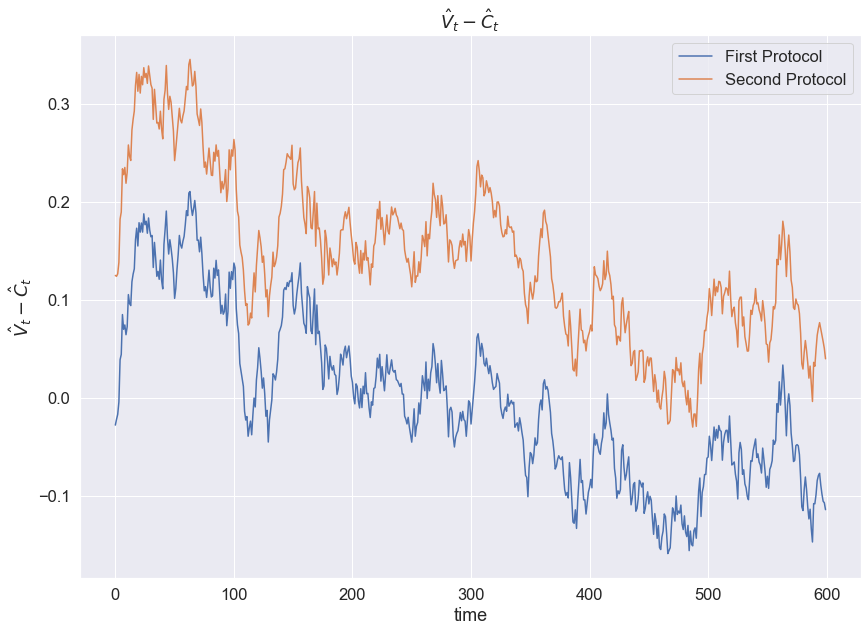

In [16]:
plot_time_series_2([vmc_t_first_series, vmc_t_second_series], title = r'$\hat V_{{t}} - \hat C_{{t}}$',\
                label = ['First Protocol', 'Second Protocol'])

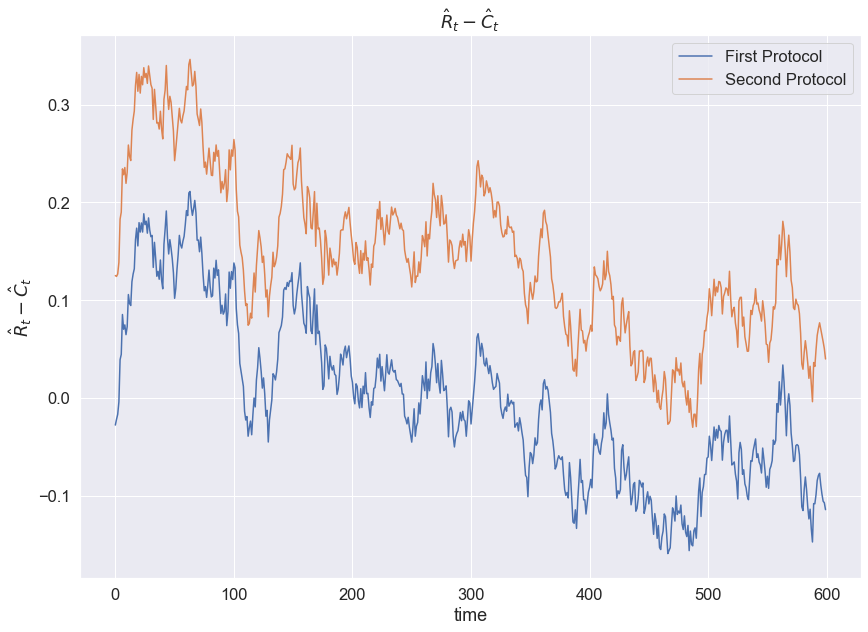

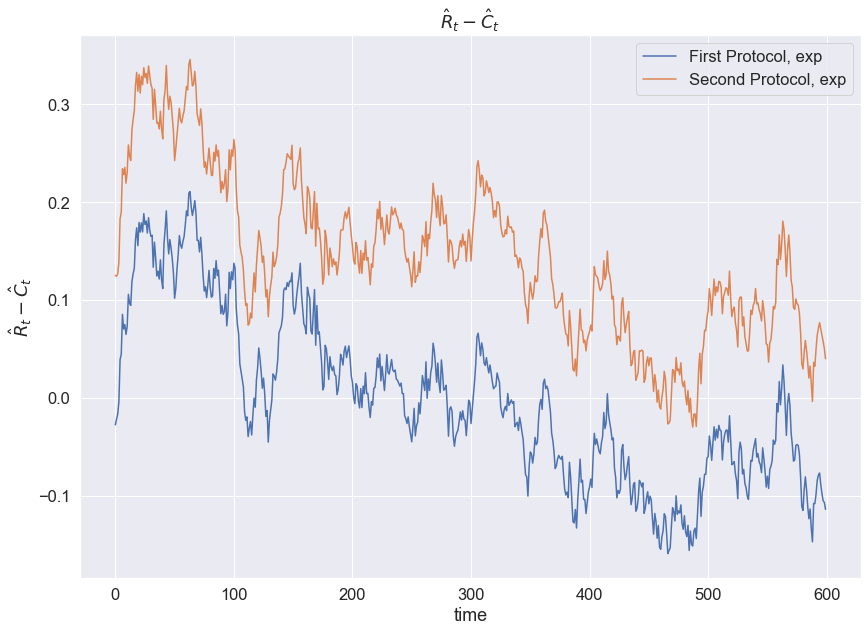

In [17]:
plot_time_series_2([rmc_t_approx_first_series, rmc_t_approx_second_series], title = r'$\hat R_{{t}} - \hat C_{{t}}$',\
                label = ['First Protocol', 'Second Protocol'])
plot_time_series_2([rmc_t_exp_first_series, rmc_t_exp_second_series], title = r'$\hat R_{{t}} - \hat C_{{t}}$',\
                label = ['First Protocol, exp', 'Second Protocol, exp'])

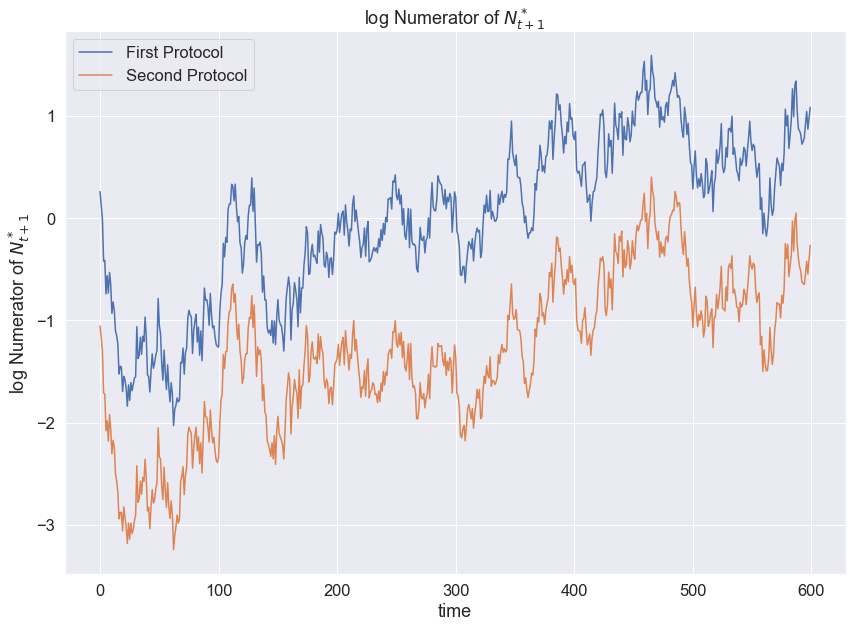

In [18]:
plot_time_series_2([log_N_tp1_num_first_series, log_N_tp1_num_second_series], title = 'log Numerator of $N_{{t+1}}^*$',\
                label = ['First Protocol', 'Second Protocol'])

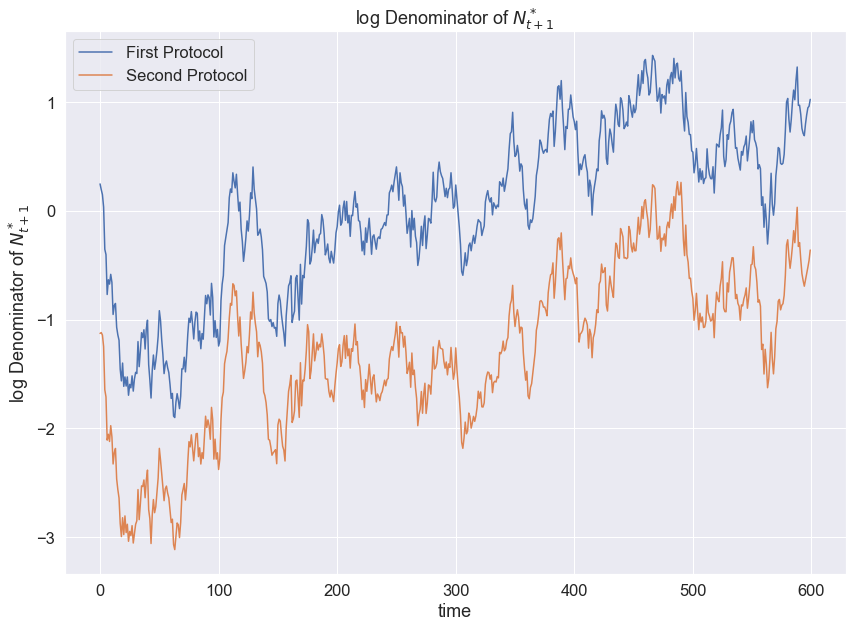

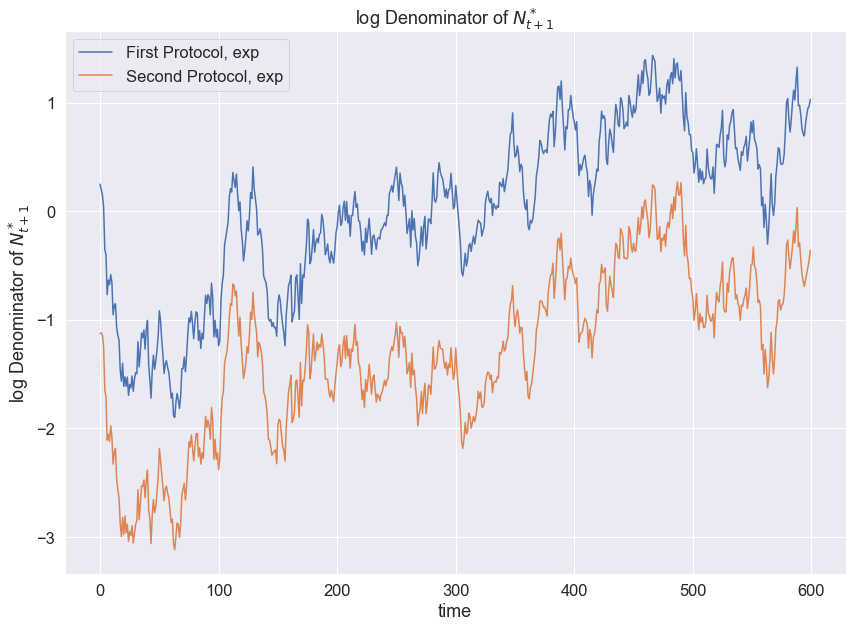

In [19]:
plot_time_series_2([log_N_tp1_approx_deno_first_series, log_N_tp1_approx_deno_second_series], title = 'log Denominator of $N_{{t+1}}^*$',\
                label = ['First Protocol', 'Second Protocol'])
plot_time_series_2([log_N_tp1_exp_deno_first_series, log_N_tp1_exp_deno_second_series], title = 'log Denominator of $N_{{t+1}}^*$',\
                label = ['First Protocol, exp', 'Second Protocol, exp'])

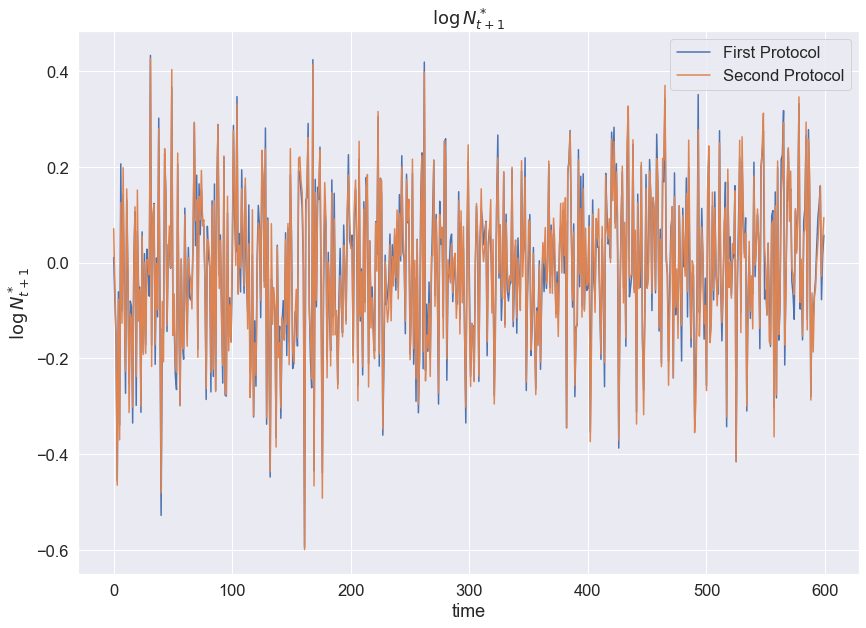

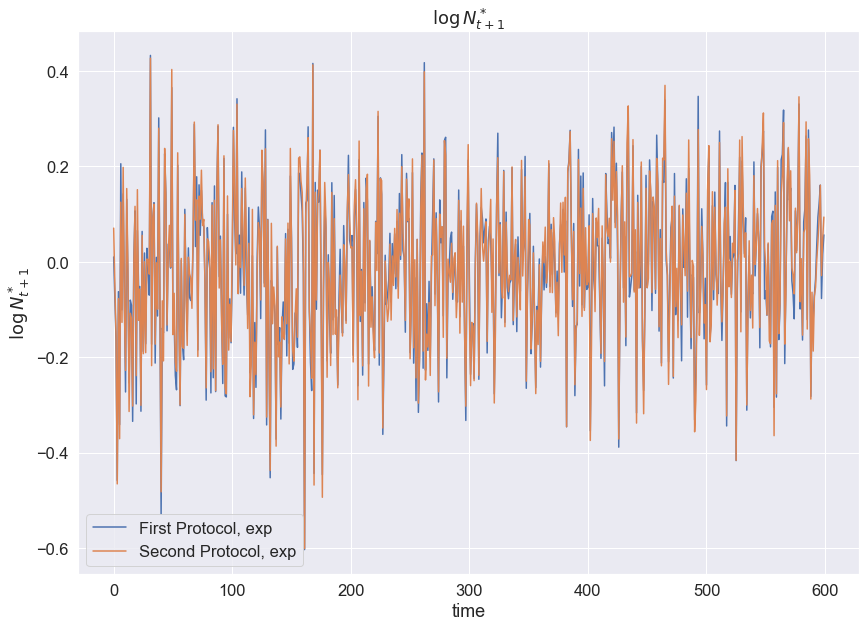

In [20]:
plot_time_series_2([log_N_tp1_approx_first_series, log_N_tp1_approx_second_series], title = r'$\log N_{{t+1}}^*$',\
                label = ['First Protocol', 'Second Protocol'])
plot_time_series_2([log_N_tp1_exp_first_series, log_N_tp1_exp_second_series], title = r'$\log N_{{t+1}}^*$',\
                label = ['First Protocol, exp', 'Second Protocol, exp'])

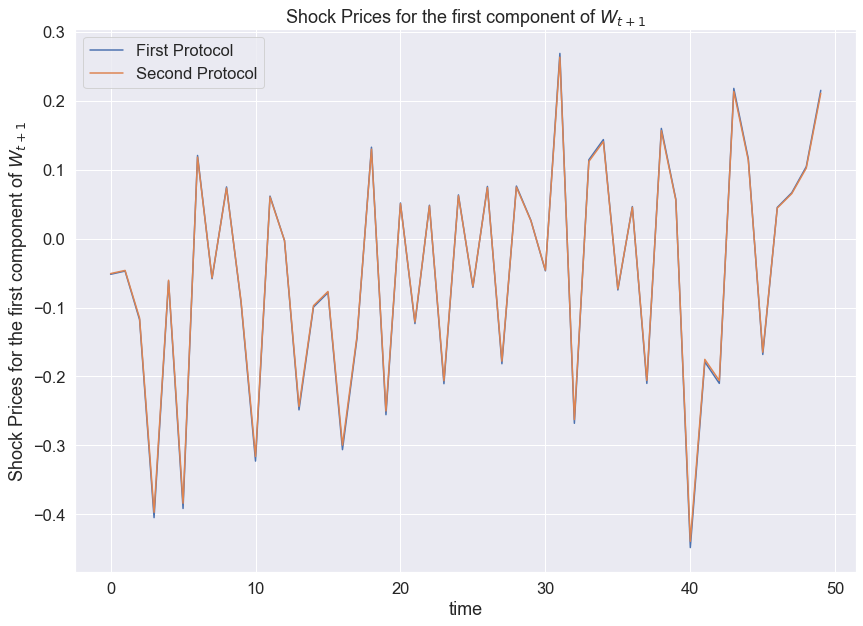

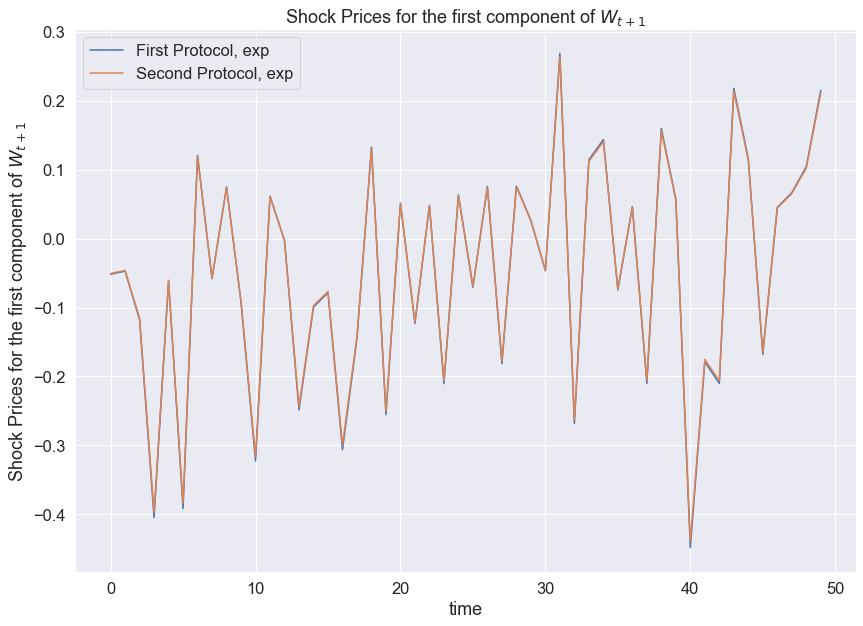

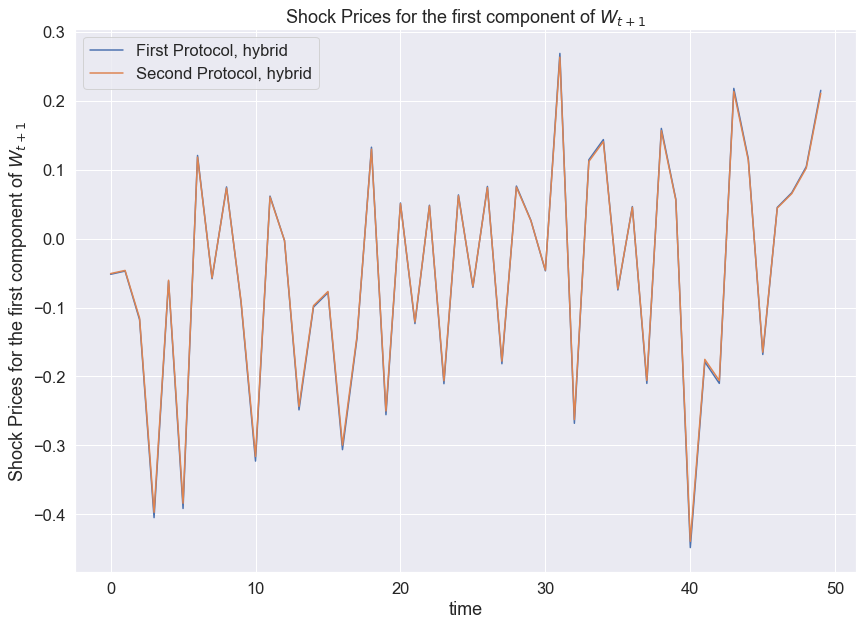

In [50]:
plot_time_series_2([log_SDF_tp1_1_approx_first_series[0:50], log_SDF_tp1_1_approx_second_series[0:50]], title = r'Shock Prices for the first component of $W_{{t+1}}$',\
                label = ['First Protocol', 'Second Protocol'])
plot_time_series_2([log_SDF_tp1_1_exp_first_series[0:50], log_SDF_tp1_1_exp_second_series[0:50]], title = r'Shock Prices for the first component of $W_{{t+1}}$',\
                label = ['First Protocol, exp', 'Second Protocol, exp'])
plot_time_series_2([log_SDF_tp1_1_hybrid_first_series[0:50], log_SDF_tp1_1_hybrid_second_series[0:50]], title = r'Shock Prices for the first component of $W_{{t+1}}$',\
                label = ['First Protocol, hybrid', 'Second Protocol, hybrid'])

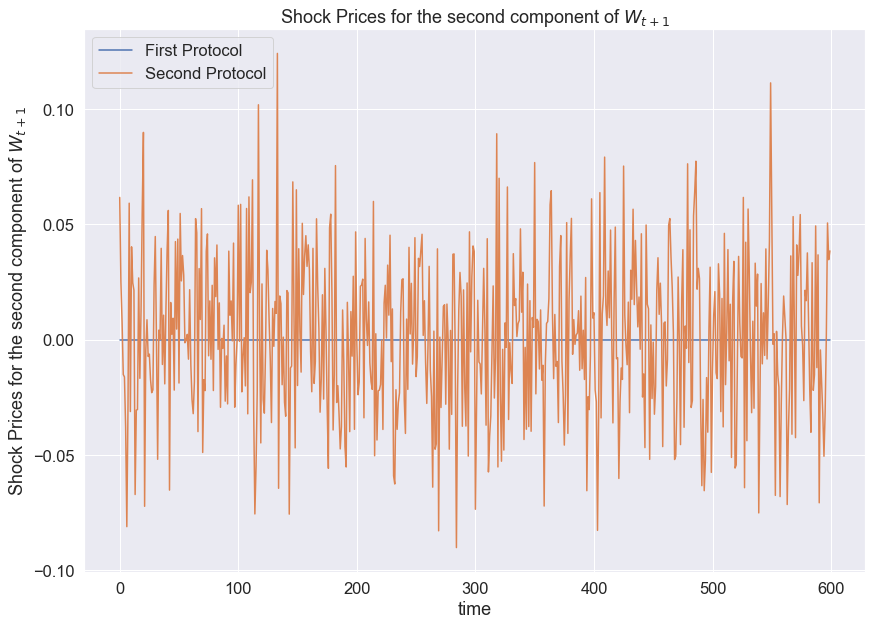

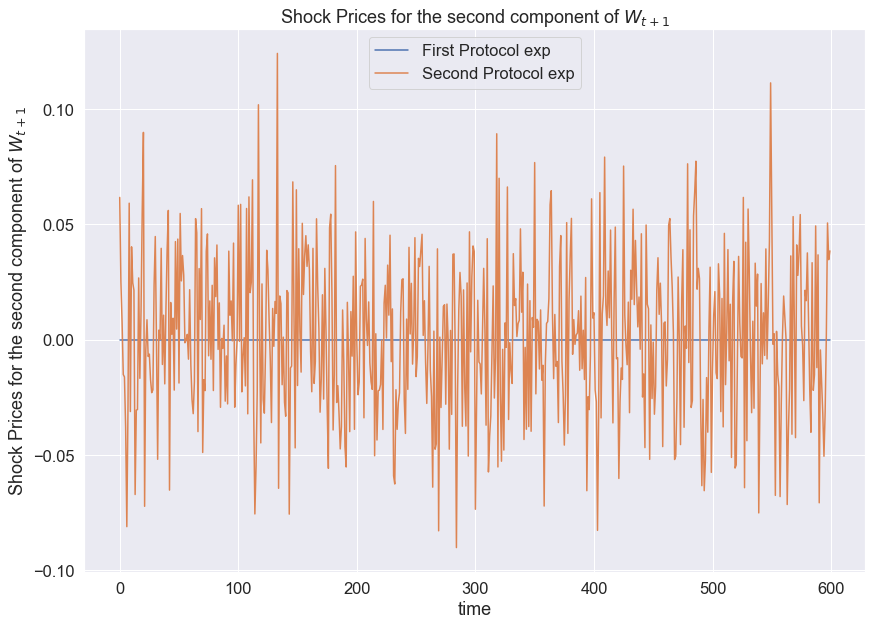

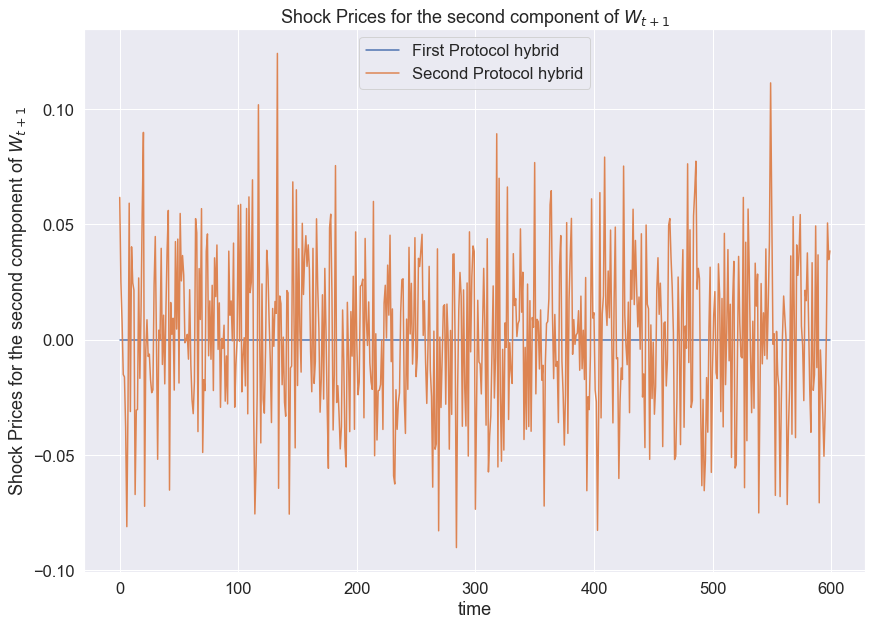

In [22]:
plot_time_series_2([log_SDF_tp1_2_approx_first_series, log_SDF_tp1_2_approx_second_series], title = r'Shock Prices for the second component of $W_{{t+1}}$',\
                label = ['First Protocol', 'Second Protocol'])
plot_time_series_2([log_SDF_tp1_2_exp_first_series, log_SDF_tp1_2_exp_second_series], title = r'Shock Prices for the second component of $W_{{t+1}}$',\
                label = ['First Protocol exp', 'Second Protocol exp'])
plot_time_series_2([log_SDF_tp1_2_hybrid_first_series, log_SDF_tp1_2_hybrid_second_series], title = r'Shock Prices for the second component of $W_{{t+1}}$',\
                label = ['First Protocol hybrid', 'Second Protocol hybrid'])

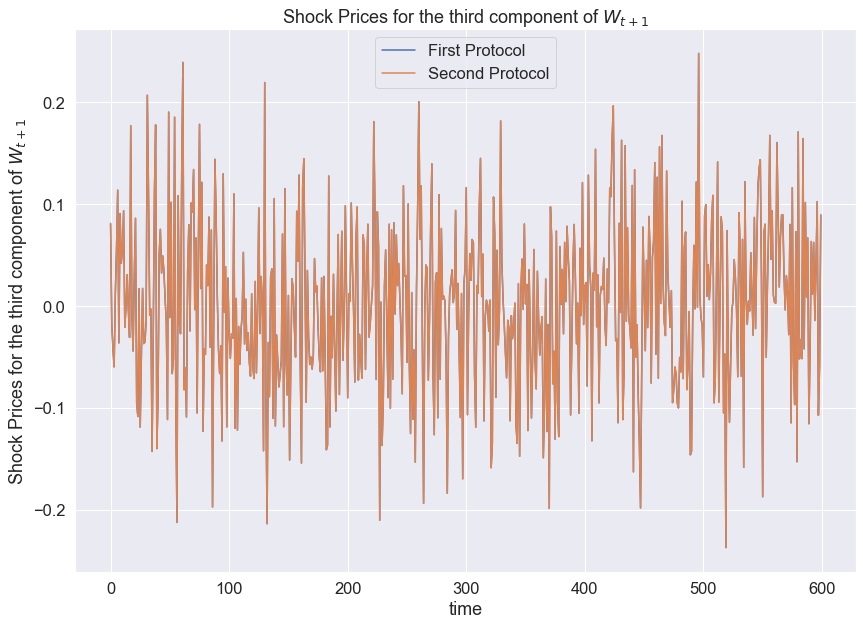

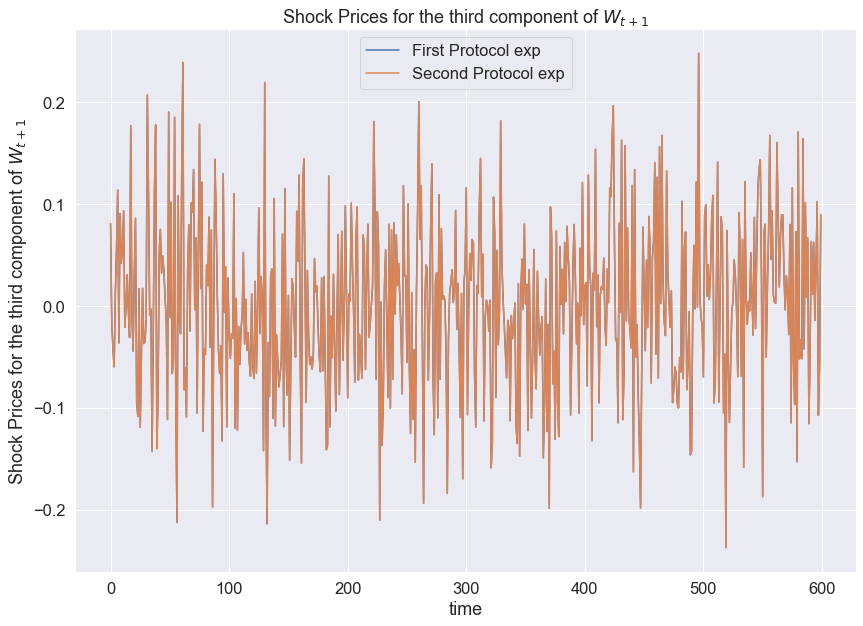

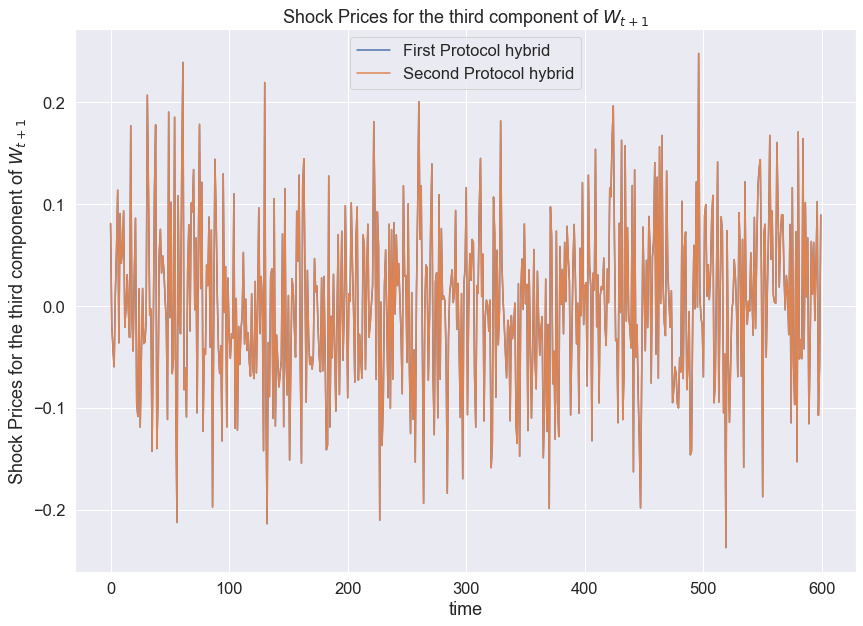

In [23]:
plot_time_series_2([log_SDF_tp1_3_approx_first_series, log_SDF_tp1_3_approx_second_series], title = r'Shock Prices for the third component of $W_{{t+1}}$',\
                label = ['First Protocol', 'Second Protocol'])
plot_time_series_2([log_SDF_tp1_3_exp_first_series, log_SDF_tp1_3_exp_second_series], title = r'Shock Prices for the third component of $W_{{t+1}}$',\
                label = ['First Protocol exp', 'Second Protocol exp'])
plot_time_series_2([log_SDF_tp1_3_hybrid_first_series, log_SDF_tp1_3_hybrid_second_series], title = r'Shock Prices for the third component of $W_{{t+1}}$',\
                label = ['First Protocol hybrid', 'Second Protocol hybrid'])

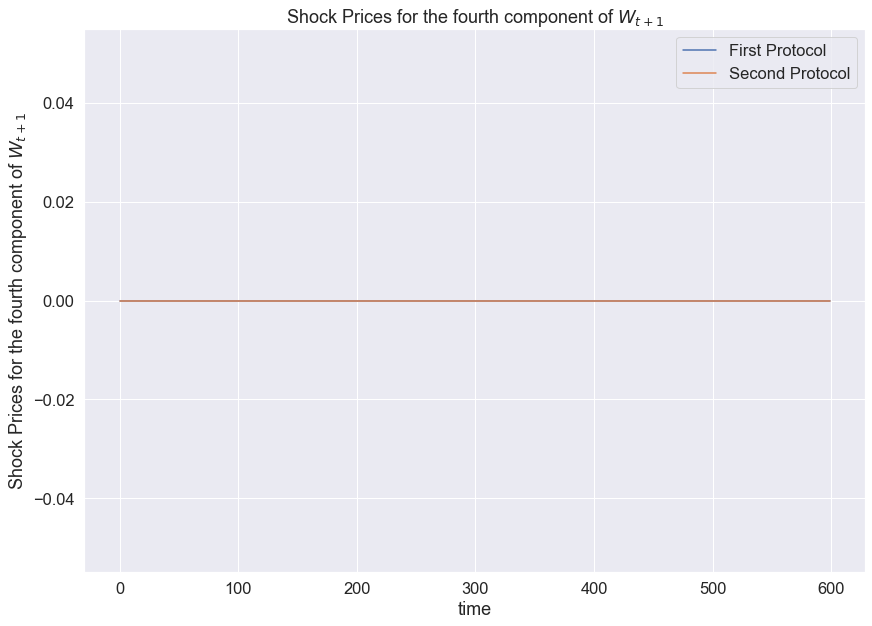

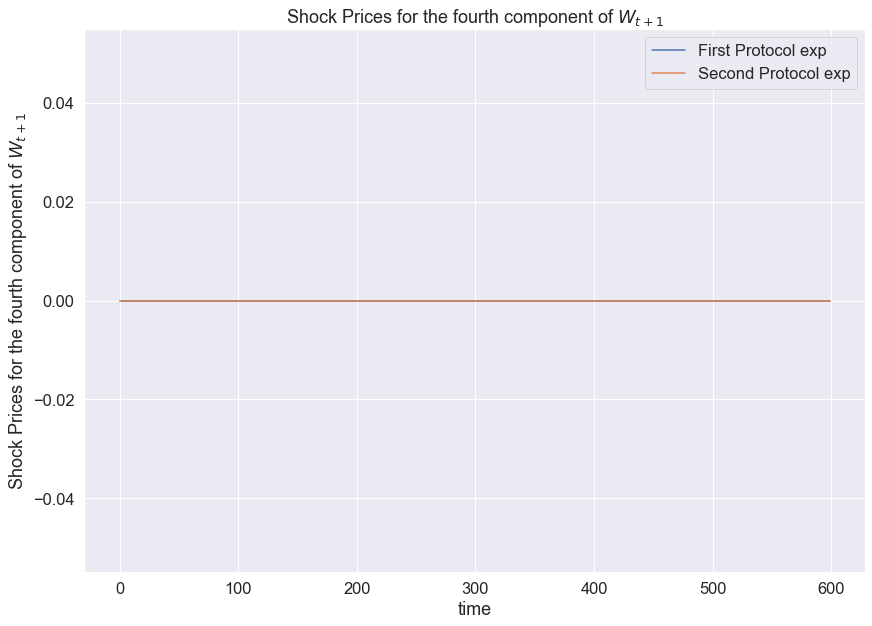

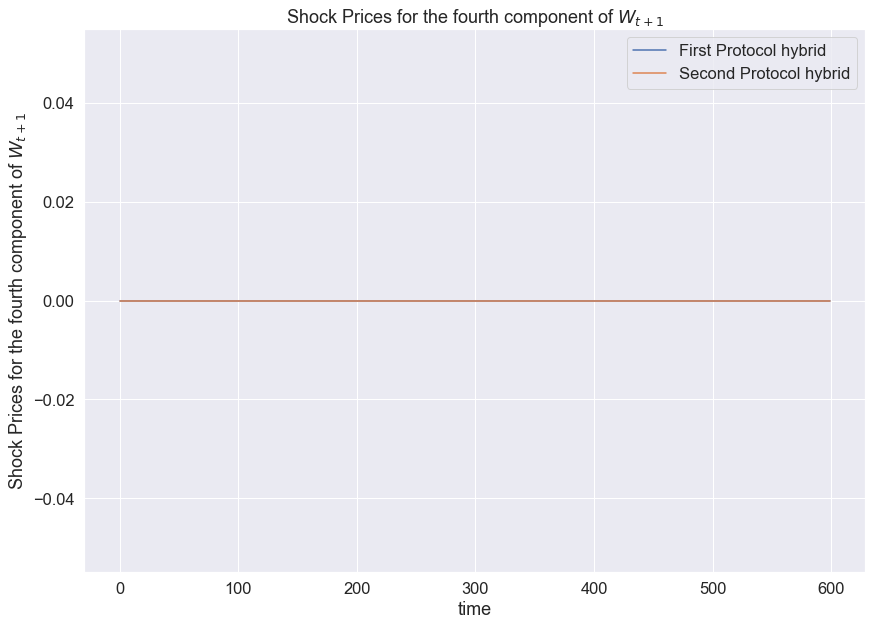

In [24]:
plot_time_series_2([log_SDF_tp1_4_approx_first_series, log_SDF_tp1_4_approx_second_series], title = r'Shock Prices for the fourth component of $W_{{t+1}}$',\
                label = ['First Protocol', 'Second Protocol'])
plot_time_series_2([log_SDF_tp1_4_exp_first_series, log_SDF_tp1_4_exp_second_series], title = r'Shock Prices for the fourth component of $W_{{t+1}}$',\
                label = ['First Protocol exp', 'Second Protocol exp'])
plot_time_series_2([log_SDF_tp1_4_hybrid_first_series, log_SDF_tp1_4_hybrid_second_series], title = r'Shock Prices for the fourth component of $W_{{t+1}}$',\
                label = ['First Protocol hybrid', 'Second Protocol hybrid'])

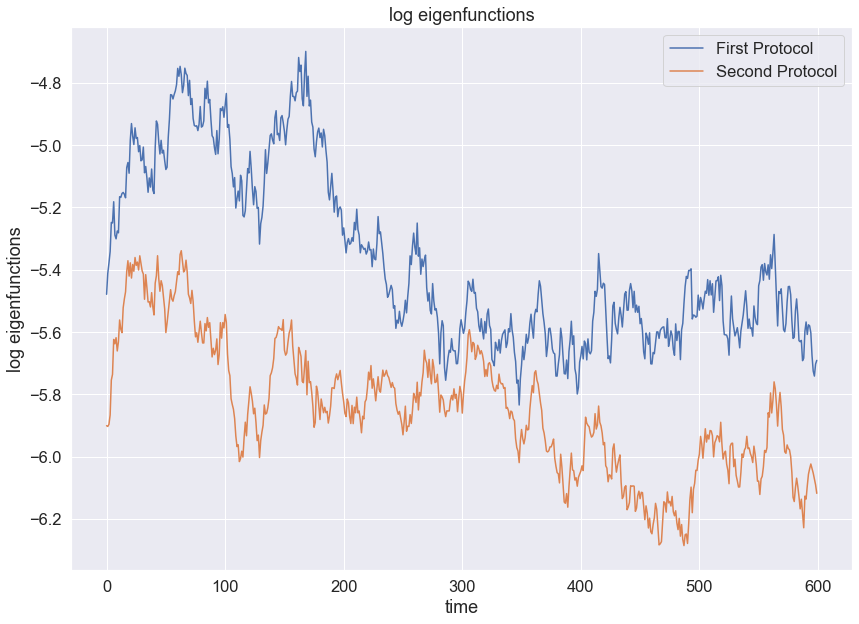

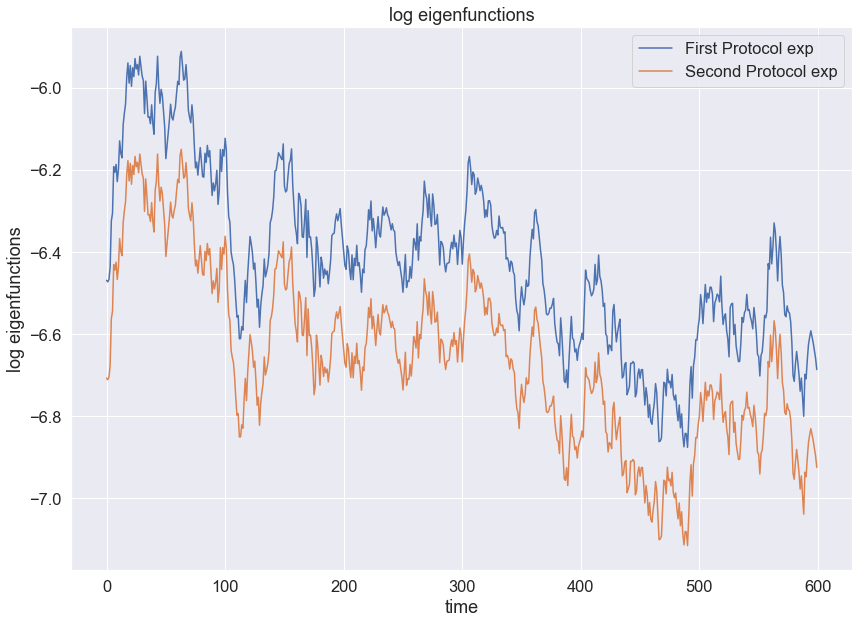

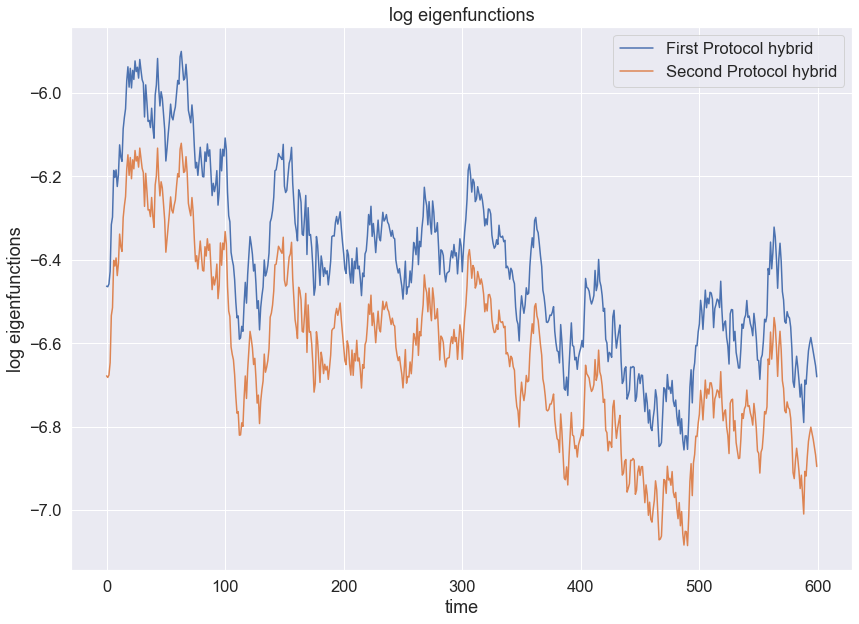

In [25]:
plot_time_series_2([e_d_approx_first_series, e_d_approx_second_series], title = 'log eigenfunctions', label = ['First Protocol', 'Second Protocol'])
plot_time_series_2([e_d_exp_first_series, e_d_exp_second_series], title = 'log eigenfunctions', label = ['First Protocol exp', 'Second Protocol exp'])
plot_time_series_2([e_d_hybrid_first_series, e_d_hybrid_second_series], title = 'log eigenfunctions', label = ['First Protocol hybrid', 'Second Protocol hybrid'])

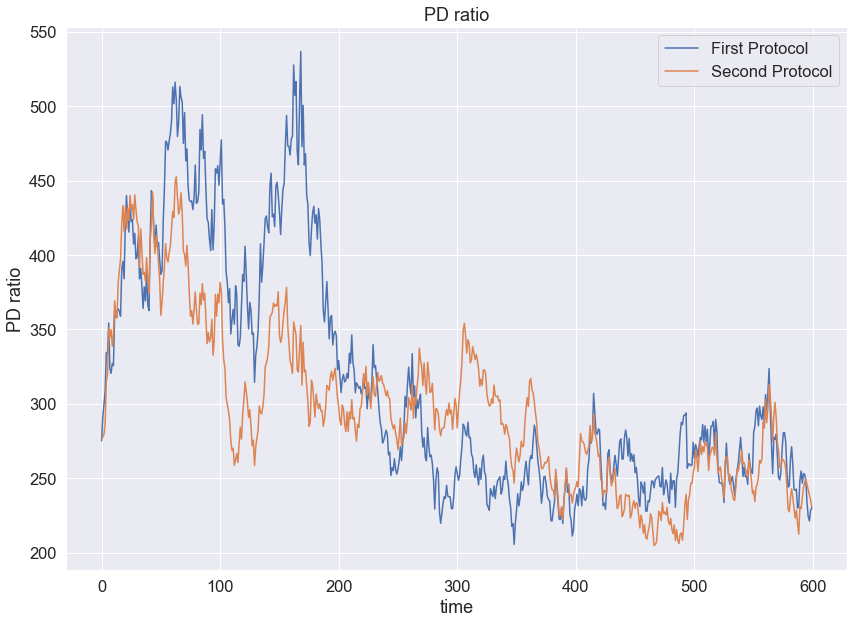

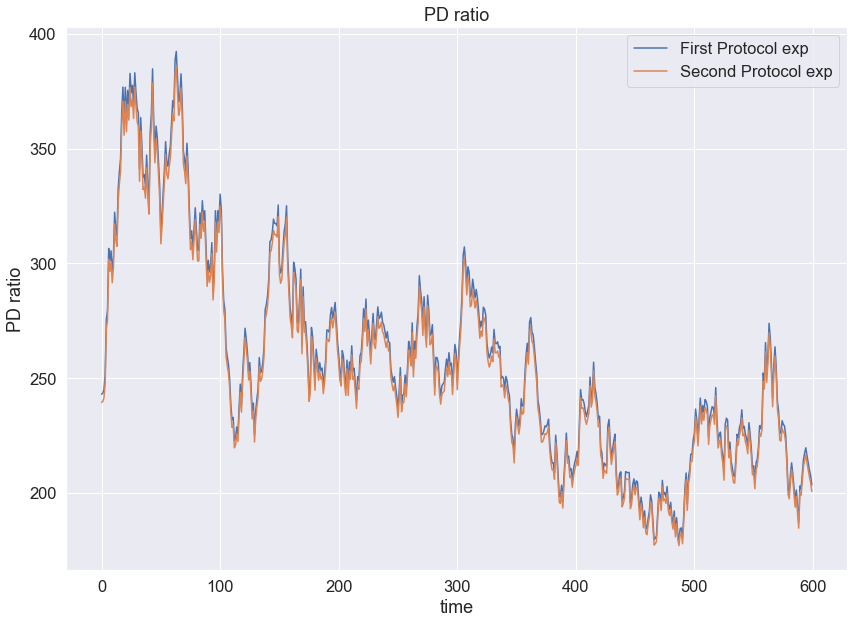

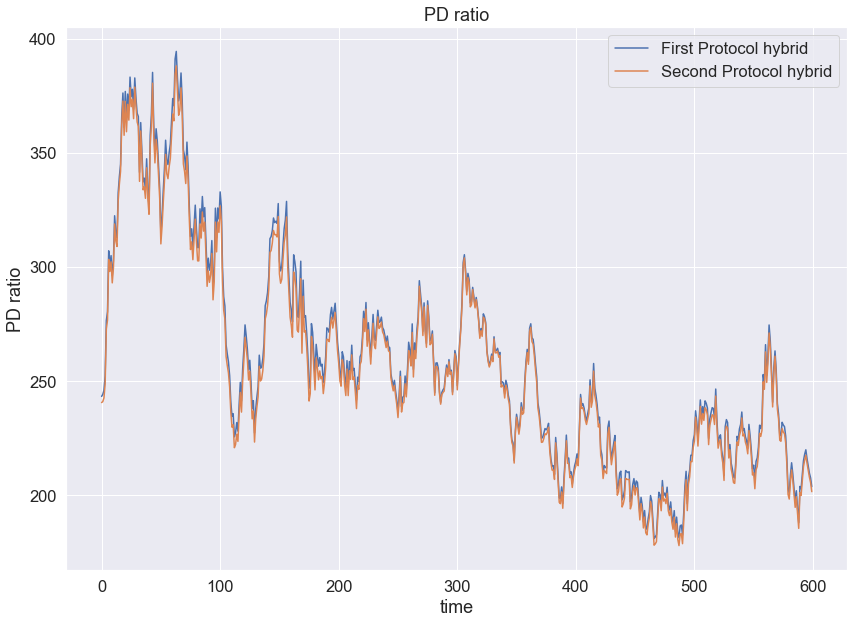

In [26]:
plot_time_series_2([PD_list_approx_first_sim, PD_list_approx_second_sim], title = 'PD ratio',\
                label = ['First Protocol', 'Second Protocol'])
plot_time_series_2([PD_list_exp_first_sim, PD_list_exp_second_sim], title = 'PD ratio',\
                label = ['First Protocol exp', 'Second Protocol exp'])
plot_time_series_2([PD_list_hybrid_first_sim, PD_list_hybrid_second_sim], title = 'PD ratio',\
                label = ['First Protocol hybrid', 'Second Protocol hybrid'])

In [27]:
pd_ratio = pd.DataFrame([[np.mean(PD_list_approx_first_sim)/12, np.mean(PD_list_approx_second_sim)/12, np.mean(PD_list_exp_first_sim)/12, np.mean(PD_list_exp_second_sim)/12, np.mean(PD_list_hybrid_first_sim)/12, np.mean(PD_list_hybrid_second_sim)/12,  np.mean(PD_list_IT_third_sim)/12],\
                   [np.log(PD_list_approx_first_sim).std(),np.log(PD_list_approx_second_sim).std(),np.log(PD_list_exp_first_sim).std(),np.log(PD_list_exp_second_sim).std(),np.log(PD_list_hybrid_first_sim).std(),np.log(PD_list_hybrid_second_sim).std(),np.log(PD_list_IT_third_sim).std()]]).T
pd_ratio.index = ['First Protocol','Second Protocol','First Protocol exp','Second Protocol exp','First Protocol hybrid','Second Protocol hybrid','Expansion Suite hybrid']
pd_ratio.columns = ['Mean','Std']
pd_ratio.to_csv('pd_700.csv')

In [28]:
pd_ratio

Mean    Std
First Protocol         26.1128 0.2393
Second Protocol        24.7060 0.1795
First Protocol exp     21.5365 0.1749
Second Protocol exp    21.2159 0.1743
First Protocol hybrid  21.6017 0.1751
Second Protocol hybrid 21.3236 0.1745
Expansion Suite hybrid 21.3230 0.1745

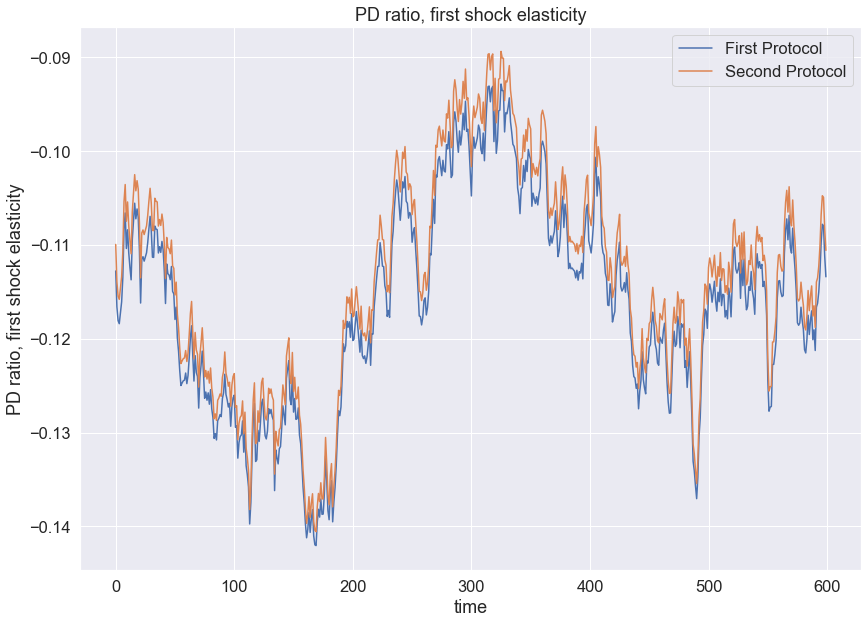

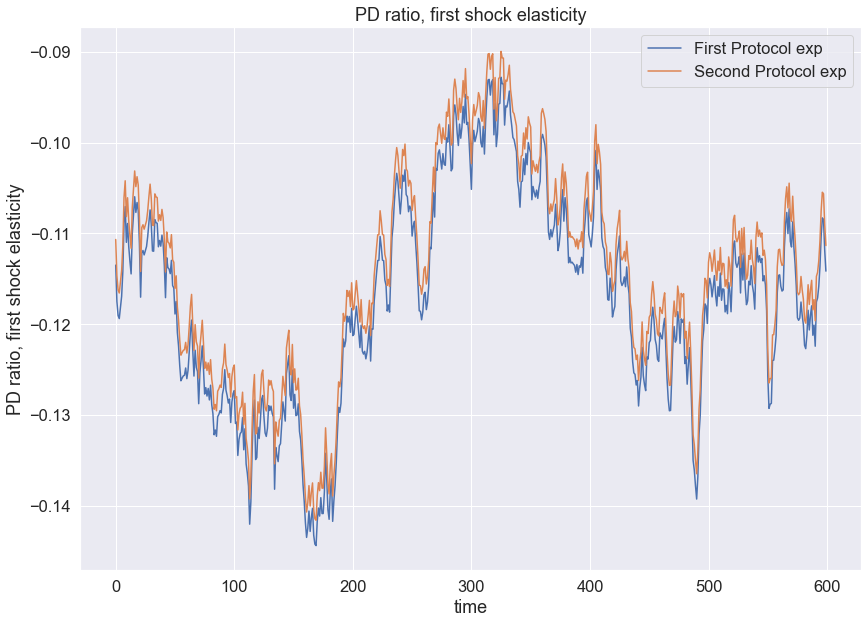

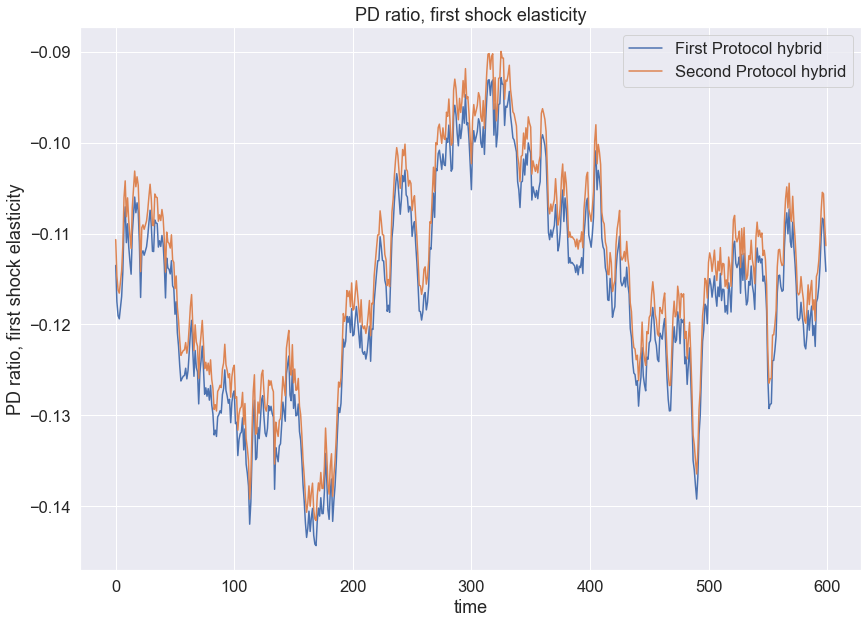

In [29]:
plot_time_series_2([shock_elasticity_1_approx_first_series, shock_elasticity_1_approx_second_series], title = 'PD ratio, first shock elasticity',\
                label = ['First Protocol', 'Second Protocol'])
plot_time_series_2([shock_elasticity_1_exp_first_series, shock_elasticity_1_exp_second_series], title = 'PD ratio, first shock elasticity',\
                label = ['First Protocol exp', 'Second Protocol exp'])
plot_time_series_2([shock_elasticity_1_hybrid_first_series, shock_elasticity_1_hybrid_second_series], title = 'PD ratio, first shock elasticity',\
                label = ['First Protocol hybrid', 'Second Protocol hybrid'])

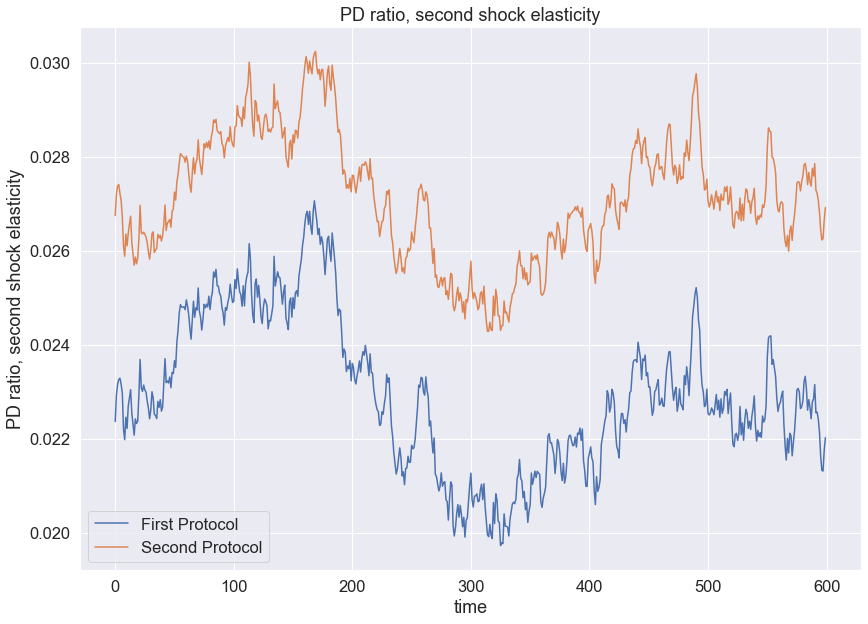

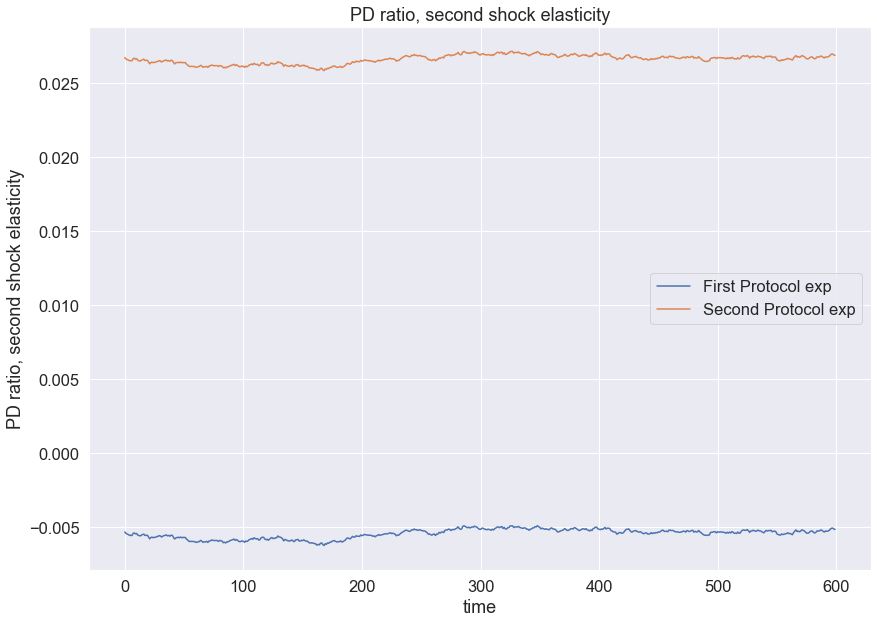

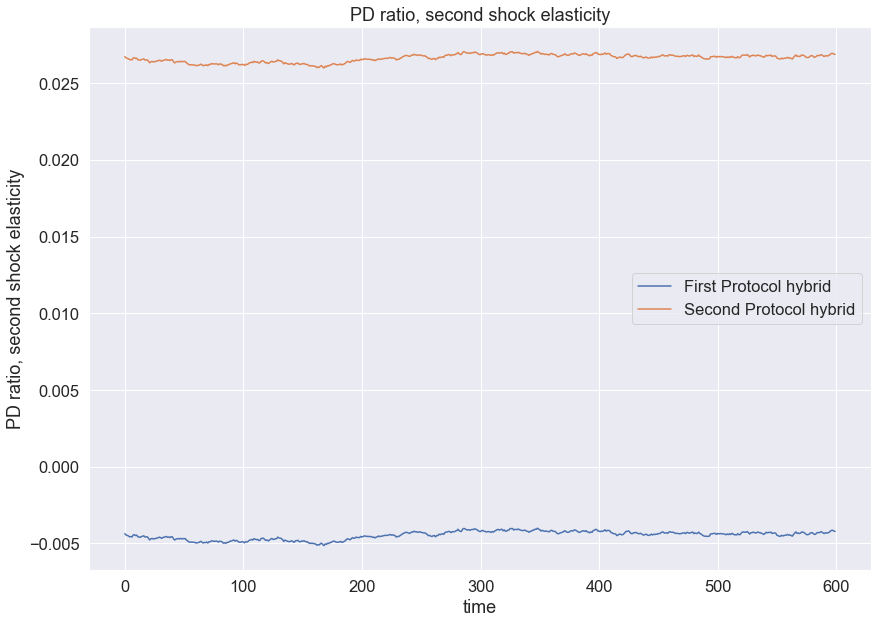

In [30]:
plot_time_series_2([shock_elasticity_2_approx_first_series, shock_elasticity_2_approx_second_series], title = 'PD ratio, second shock elasticity',\
                label = ['First Protocol', 'Second Protocol'])
plot_time_series_2([shock_elasticity_2_exp_first_series, shock_elasticity_2_exp_second_series], title = 'PD ratio, second shock elasticity',\
                label = ['First Protocol exp', 'Second Protocol exp'])
plot_time_series_2([shock_elasticity_2_hybrid_first_series, shock_elasticity_2_hybrid_second_series], title = 'PD ratio, second shock elasticity',\
                label = ['First Protocol hybrid', 'Second Protocol hybrid'])

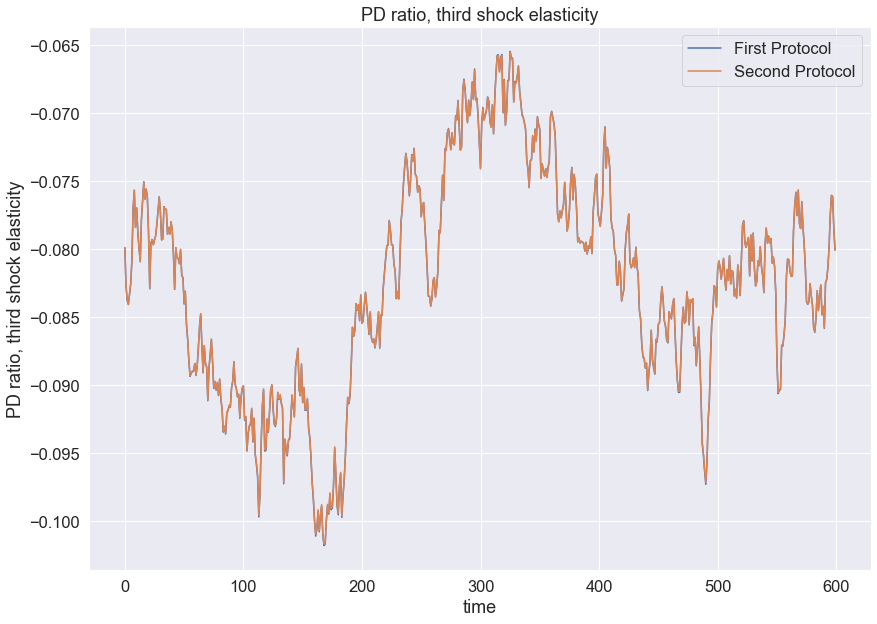

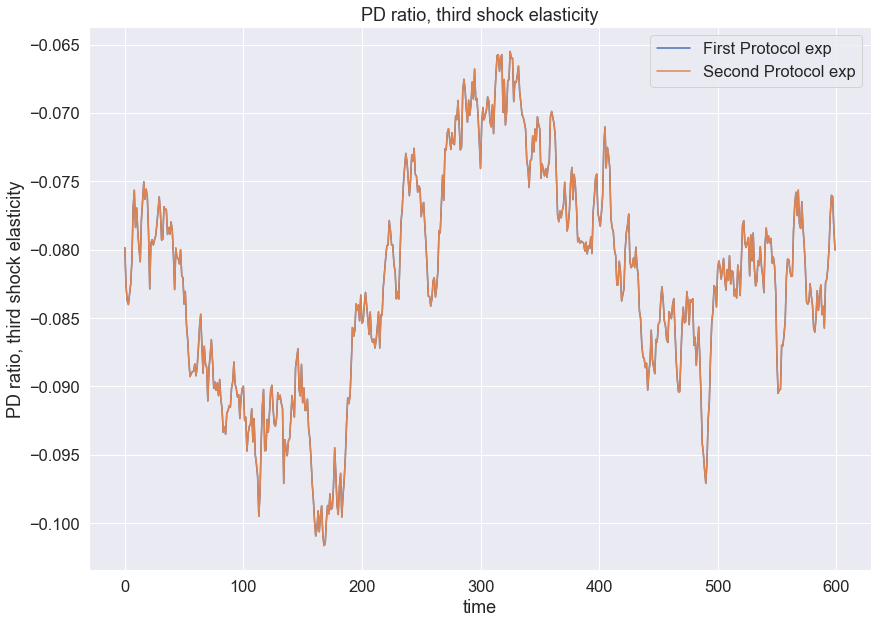

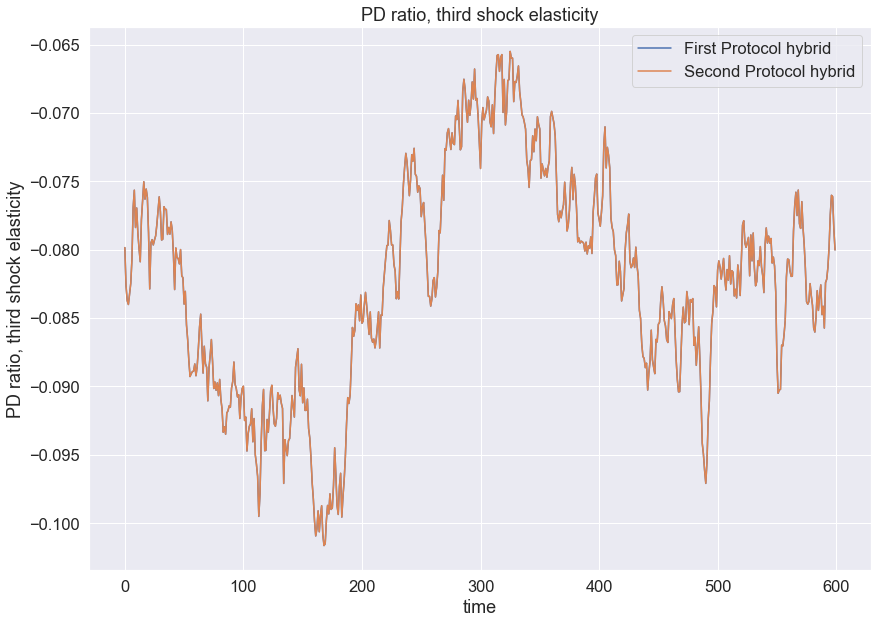

In [31]:
plot_time_series_2([shock_elasticity_3_approx_first_series, shock_elasticity_3_approx_second_series], title = 'PD ratio, third shock elasticity',\
                label = ['First Protocol', 'Second Protocol'])
plot_time_series_2([shock_elasticity_3_exp_first_series, shock_elasticity_3_exp_second_series], title = 'PD ratio, third shock elasticity',\
                label = ['First Protocol exp', 'Second Protocol exp'])
plot_time_series_2([shock_elasticity_3_hybrid_first_series, shock_elasticity_3_hybrid_second_series], title = 'PD ratio, third shock elasticity',\
                label = ['First Protocol hybrid', 'Second Protocol hybrid'])

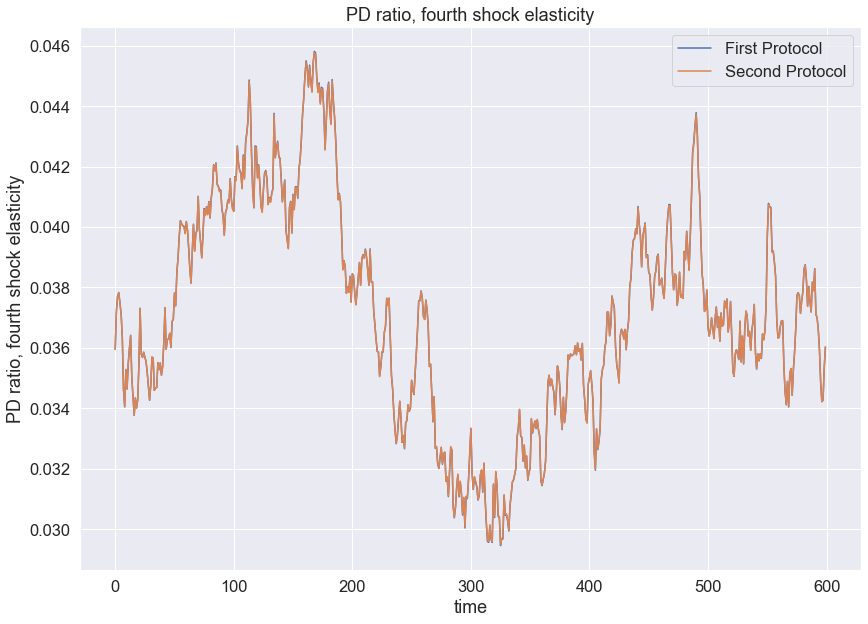

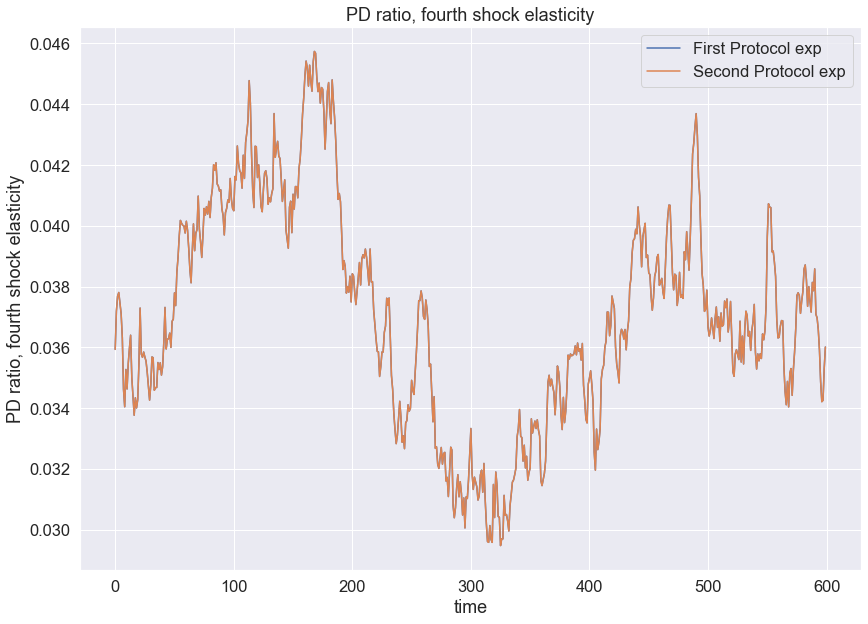

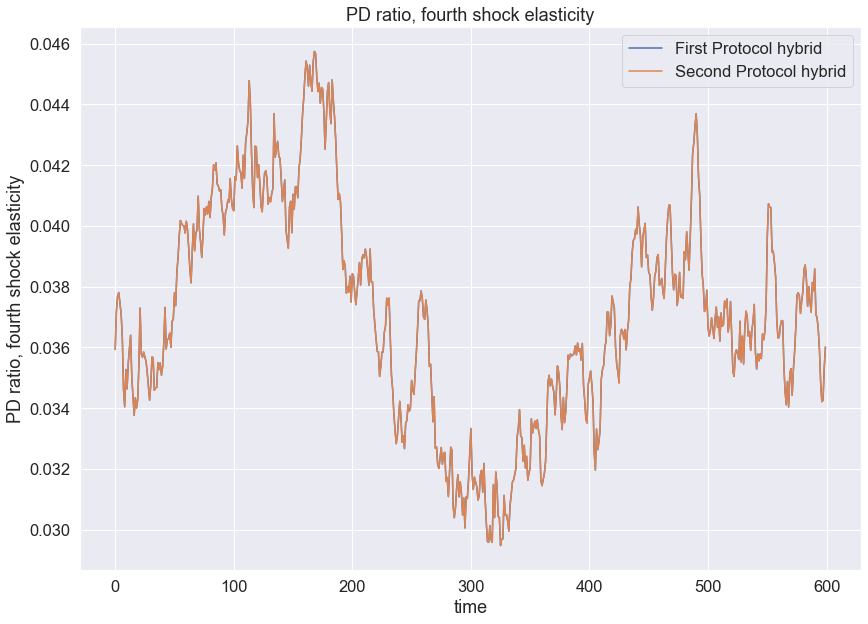

In [32]:
plot_time_series_2([shock_elasticity_4_approx_first_series, shock_elasticity_4_approx_second_series], title = 'PD ratio, fourth shock elasticity',\
                label = ['First Protocol', 'Second Protocol'])
plot_time_series_2([shock_elasticity_4_exp_first_series, shock_elasticity_4_exp_second_series], title = 'PD ratio, fourth shock elasticity',\
                label = ['First Protocol exp', 'Second Protocol exp'])
plot_time_series_2([shock_elasticity_4_hybrid_first_series, shock_elasticity_4_hybrid_second_series], title = 'PD ratio, fourth shock elasticity',\
                label = ['First Protocol hybrid', 'Second Protocol hybrid'])

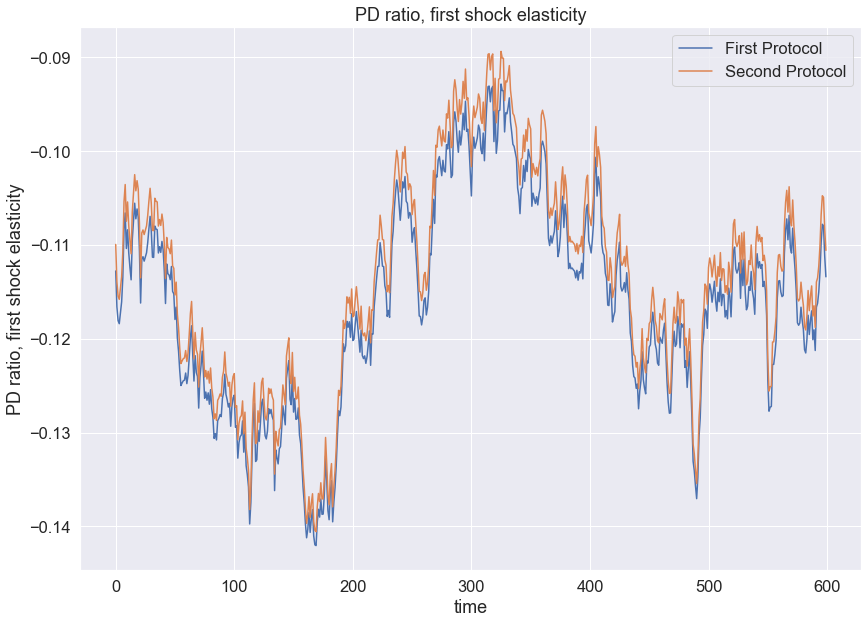

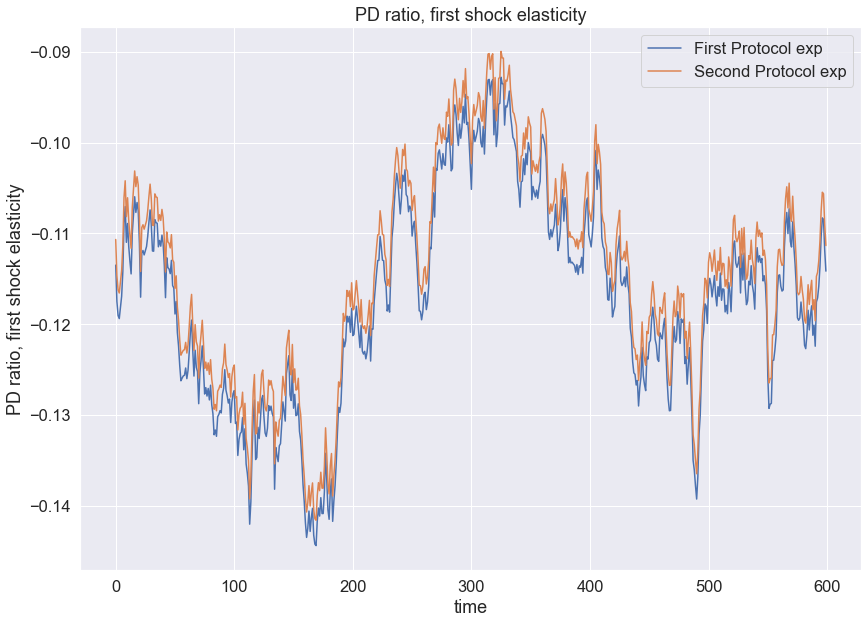

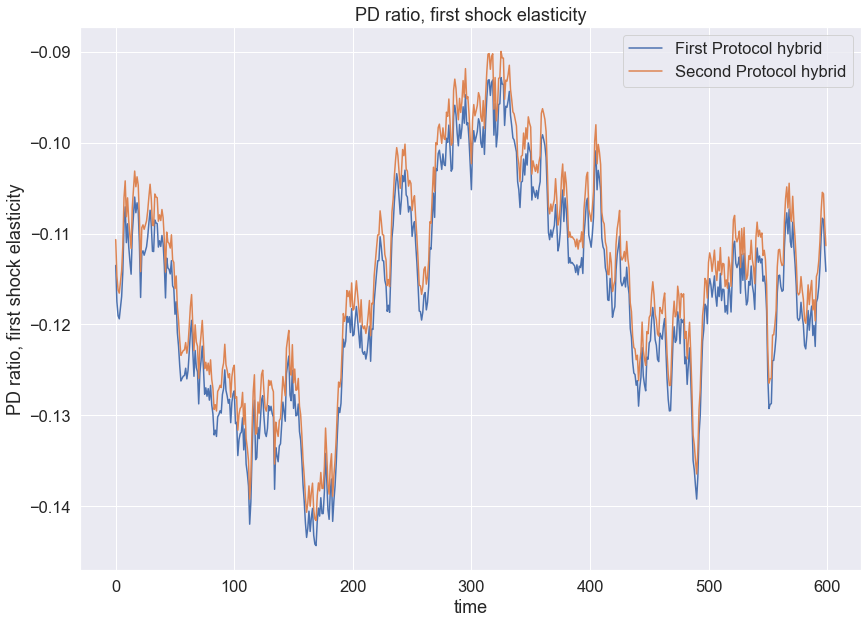

In [34]:
plot_time_series_2([shock_elasticity_1_approx_first_series_2, shock_elasticity_1_approx_second_series_2], title = 'PD ratio, first shock elasticity',\
                label = ['First Protocol', 'Second Protocol'])
plot_time_series_2([shock_elasticity_1_exp_first_series_2, shock_elasticity_1_exp_second_series_2], title = 'PD ratio, first shock elasticity',\
                label = ['First Protocol exp', 'Second Protocol exp'])
plot_time_series_2([shock_elasticity_1_hybrid_first_series_2, shock_elasticity_1_hybrid_second_series_2], title = 'PD ratio, first shock elasticity',\
                label = ['First Protocol hybrid', 'Second Protocol hybrid'])

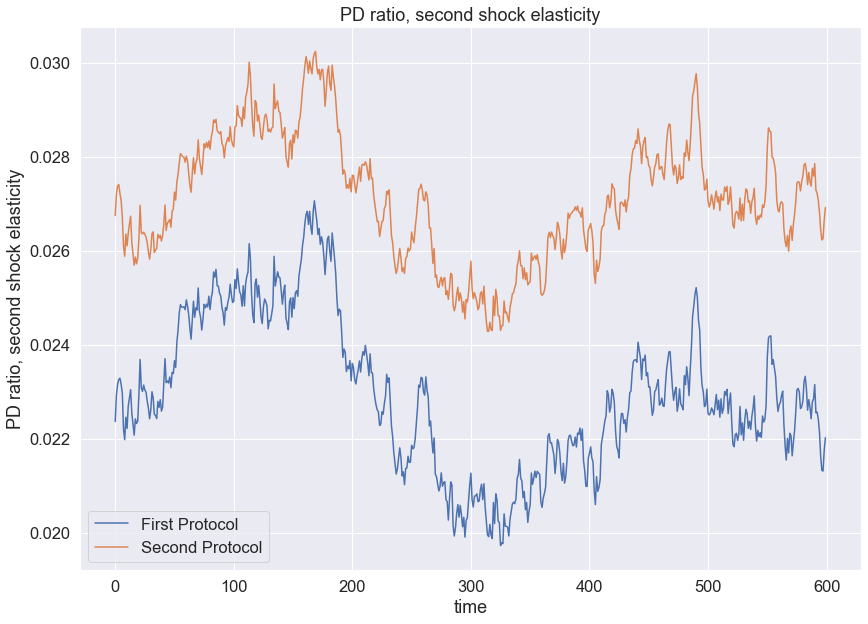

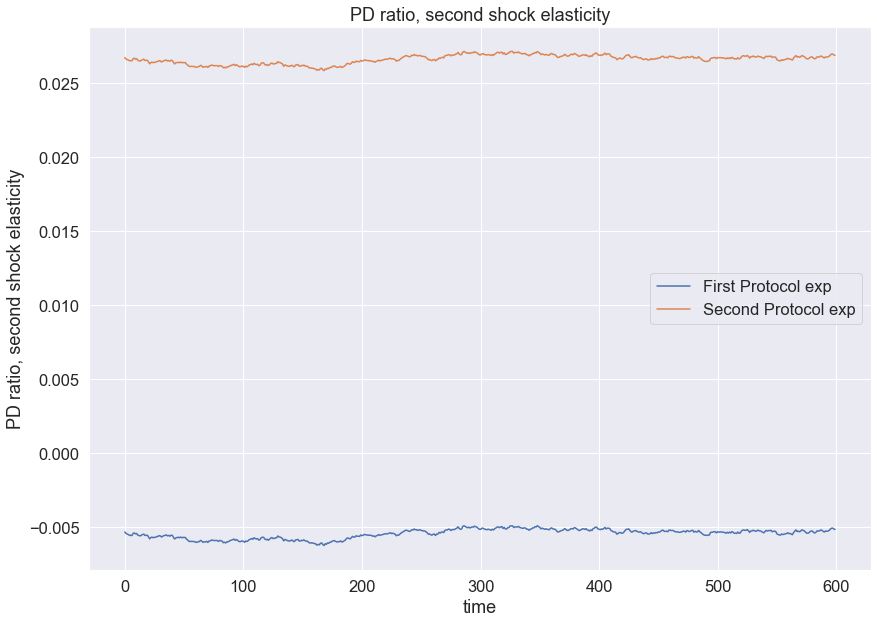

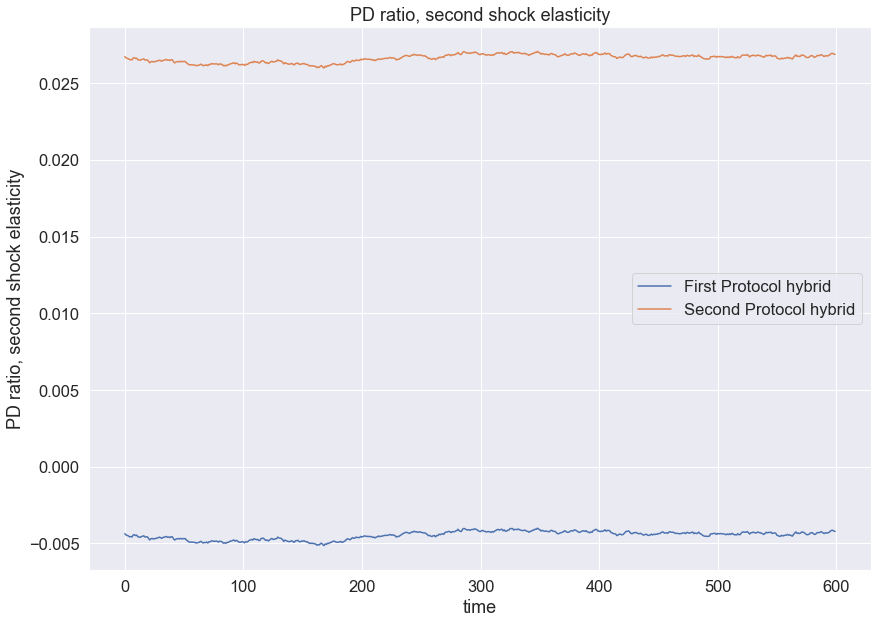

In [35]:
plot_time_series_2([shock_elasticity_2_approx_first_series_2, shock_elasticity_2_approx_second_series_2], title = 'PD ratio, second shock elasticity',\
                label = ['First Protocol', 'Second Protocol'])
plot_time_series_2([shock_elasticity_2_exp_first_series_2, shock_elasticity_2_exp_second_series_2], title = 'PD ratio, second shock elasticity',\
                label = ['First Protocol exp', 'Second Protocol exp'])
plot_time_series_2([shock_elasticity_2_hybrid_first_series_2, shock_elasticity_2_hybrid_second_series_2], title = 'PD ratio, second shock elasticity',\
                label = ['First Protocol hybrid', 'Second Protocol hybrid'])

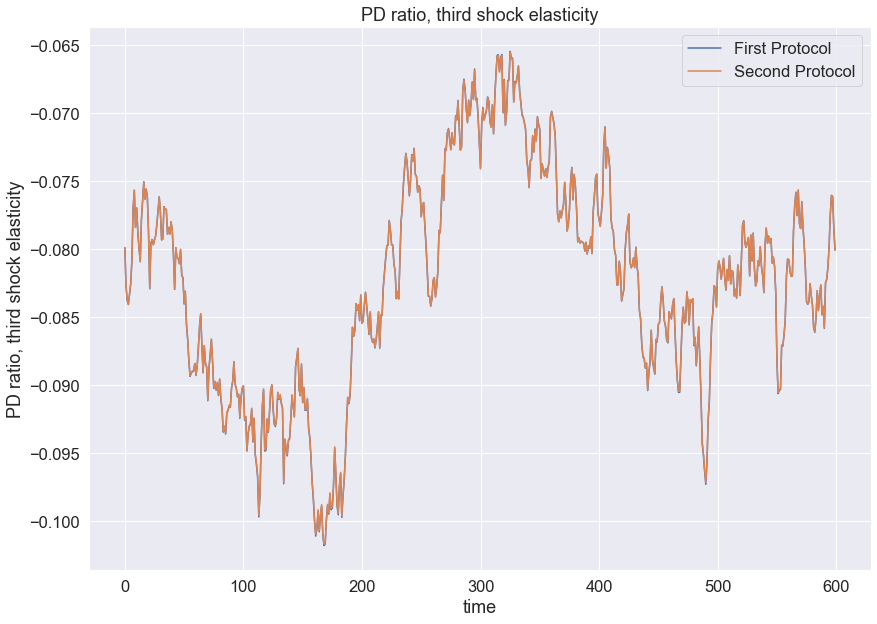

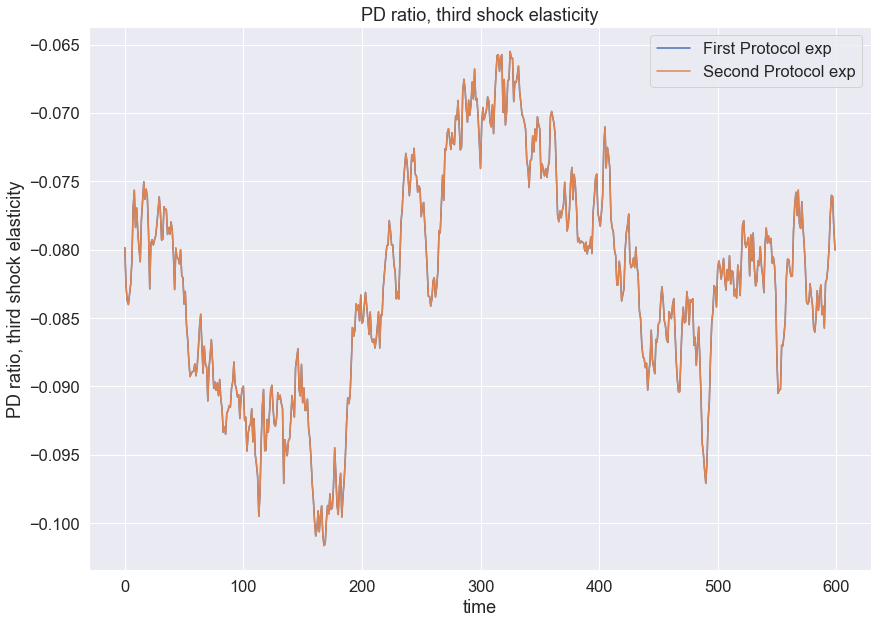

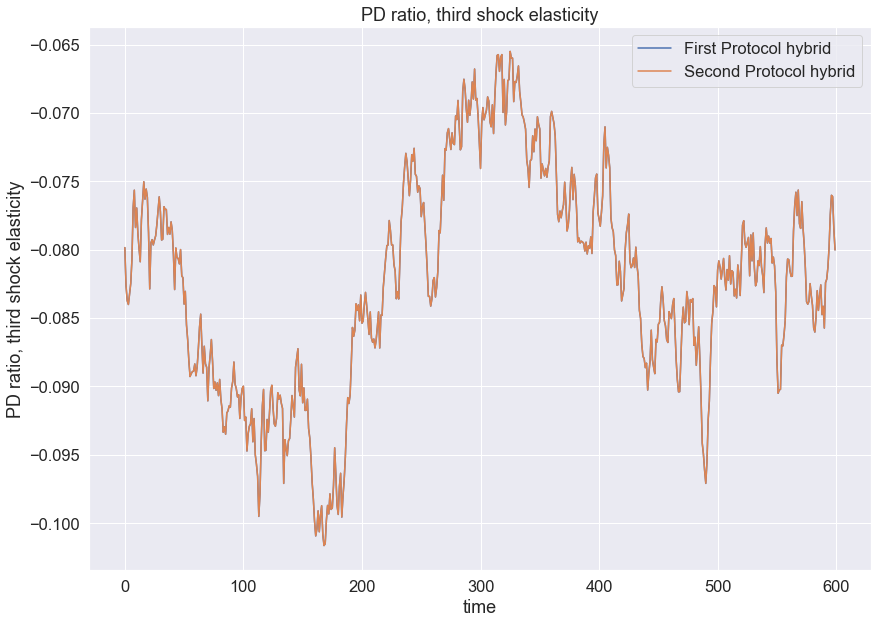

In [36]:
plot_time_series_2([shock_elasticity_3_approx_first_series_2, shock_elasticity_3_approx_second_series_2], title = 'PD ratio, third shock elasticity',\
                label = ['First Protocol', 'Second Protocol'])
plot_time_series_2([shock_elasticity_3_exp_first_series_2, shock_elasticity_3_exp_second_series_2], title = 'PD ratio, third shock elasticity',\
                label = ['First Protocol exp', 'Second Protocol exp'])
plot_time_series_2([shock_elasticity_3_hybrid_first_series_2, shock_elasticity_3_hybrid_second_series_2], title = 'PD ratio, third shock elasticity',\
                label = ['First Protocol hybrid', 'Second Protocol hybrid'])

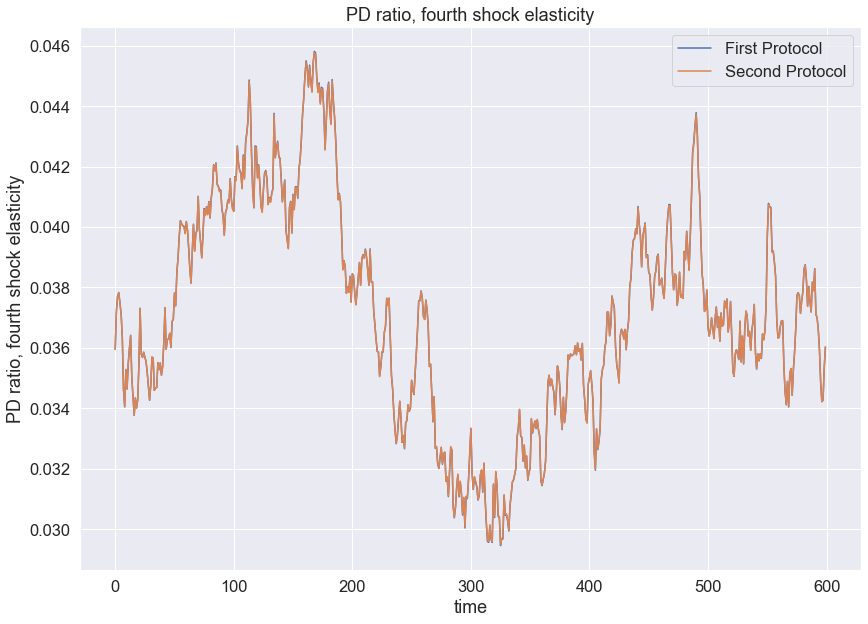

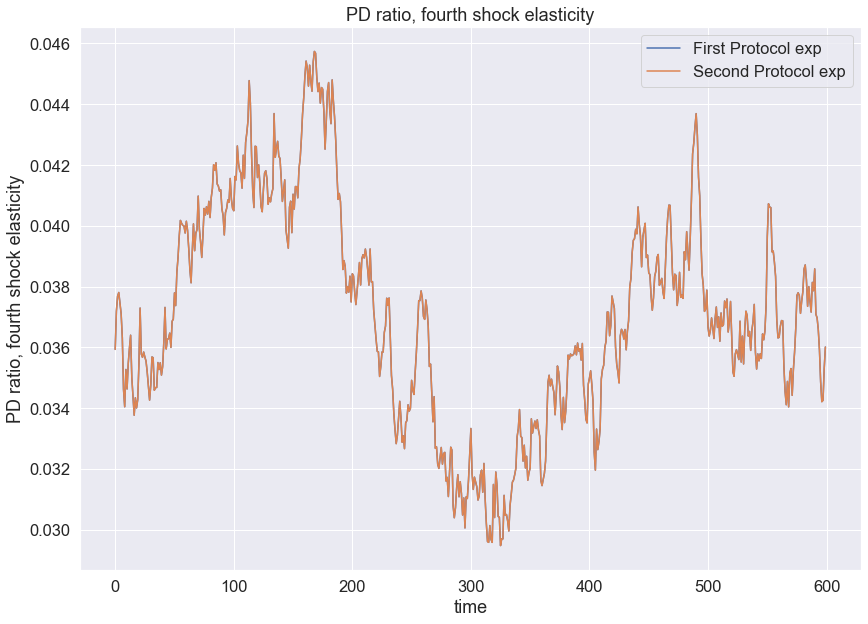

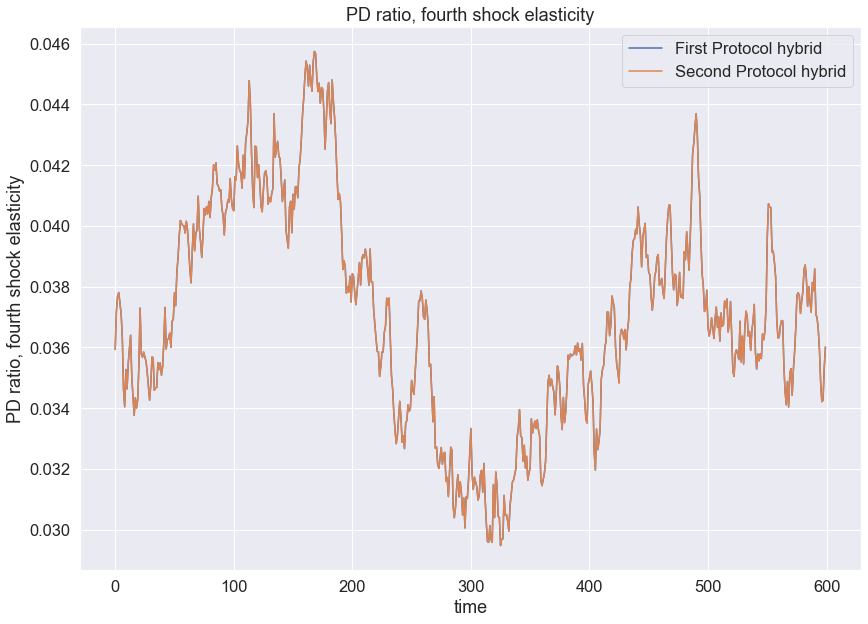

In [37]:
plot_time_series_2([shock_elasticity_4_approx_first_series_2, shock_elasticity_4_approx_second_series_2], title = 'PD ratio, fourth shock elasticity',\
                label = ['First Protocol', 'Second Protocol'])
plot_time_series_2([shock_elasticity_4_exp_first_series_2, shock_elasticity_4_exp_second_series_2], title = 'PD ratio, fourth shock elasticity',\
                label = ['First Protocol exp', 'Second Protocol exp'])
plot_time_series_2([shock_elasticity_4_hybrid_first_series_2, shock_elasticity_4_hybrid_second_series_2], title = 'PD ratio, fourth shock elasticity',\
                label = ['First Protocol hybrid', 'Second Protocol hybrid'])